# Đề tài:Phân nhóm học sinh dựa trên hành vi học tập và đặc điểm cá nhân bằng thuật toán học máy không giám sát

# 1.Định nghĩa đề tài

# 1.1.Mục tiêu

Mục tiêu chính của đề tài là áp dụng các kỹ thuật học máy không giám sát để phân nhóm học sinh dựa trên điểm mạnh, điểm yếu, hành vi học tập và các đặc điểm cá nhân. Việc phân nhóm này giúp phát hiện các kiểu hành vi học tập và xu hướng thành tích học tập khác nhau, từ đó hỗ trợ giáo viên và nhà quản lý giáo dục đưa ra các chiến lược giảng dạy phù hợp với từng nhóm học sinh.



# 1.2.Bối cảnh

Trong thời đại chuyển đổi số và kinh tế tri thức, nguồn nhân lực chất lượng cao đóng vai trò then chốt trong phát triển kinh tế. Giáo dục cần đổi mới theo hướng cá nhân hóa để đáp ứng yêu cầu của thị trường lao động. Tuy nhiên, việc phân tích hành vi và nhu cầu học tập của từng học sinh thủ công là không khả thi khi dữ liệu ngày càng lớn. Do đó, việc ứng dụng học máy, đặc biệt là các phương pháp phân nhóm, giúp giáo viên hiểu rõ từng đối tượng học sinh, từ đó đưa ra giải pháp giảng dạy phù hợp. Đây là nền tảng quan trọng để nâng cao chất lượng giáo dục, góp phần phát triển nguồn nhân lực phục vụ nền kinh tế số.

# 1.3.Giải pháp

Tiền xử lý dữ liệu: Làm sạch, mã hóa và chuẩn hóa dữ liệu để đảm bảo đầu vào phù hợp cho các thuật toán học máy.

Giảm chiều dữ liệu: Sử dụng PCA để giảm số chiều, loại bỏ nhiễu và hỗ trợ trực quan hóa kết quả phân cụm.

Phân cụm học sinh: Áp dụng các thuật toán như KMeans, DBSCAN và Hierarchical Clustering để phân nhóm học sinh có đặc điểm tương đồng.

Đánh giá và phân tích kết quả: Dùng các chỉ số như Silhouette Score để đánh giá chất lượng phân cụm, từ đó phân tích từng nhóm học sinh.

Trực quan hóa và ứng dụng: Trình bày kết quả bằng biểu đồ và đề xuất các giải pháp cá nhân hóa học tập, hỗ trợ học sinh yếu, nâng cao hiệu quả giảng dạy.

# 2.Các thư viện cần thiết

In [ ]:
# Các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
# Thư viện cho tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Thư viện cho giảm chiều dữ liệu bằng PCA:
from sklearn.decomposition import PCA

In [ ]:
# Thư viện cho phân nhóm học sinh bằng các thuật toán học máy không giám sát:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
# Thư viện đánh giá hiệu quả phân cụm
from sklearn.metrics import silhouette_score, davies_bouldin_score

# 3.Thu thập và khám phá dữ liệu

# 3.1.Tải dữ liệu

In [ ]:
# Đọc dữ liệu từ file
df = pd.read_csv('xAPI-Edu-Data.csv')

# Hiển thị thông tin tổng quát và 5 dòng đầu tiên
print(df.info())
df.head()

Tập dữ liệu xAPI-Edu-Data bao gồm 480 học sinh với 17 thuộc tính, trong đó có 13 thuộc tính dạng phân loại (object) và 4 thuộc tính dạng số nguyên (int64). Tất cả các giá trị trong tập dữ liệu đều đầy đủ, không có dữ liệu bị thiếu, điều này cho thấy chất lượng dữ liệu khá tốt và có thể sử dụng ngay cho các bước phân tích hoặc huấn luyện mô hình học máy. Các thuộc tính trong dữ liệu cung cấp thông tin đa dạng như giới tính, quốc tịch, nơi sinh, cấp học, lớp học, môn học, học kỳ, mức độ tương tác của học sinh (giơ tay, truy cập tài nguyên, xem thông báo, tham gia thảo luận), cùng với ý kiến phụ huynh và số ngày nghỉ học.

Biến mục tiêu của bài toán là Class, thể hiện mức độ học lực của học sinh và được chia thành ba mức: Low (L), Middle (M) và High (H), phù hợp với các bài toán phân loại trong học máy.

Các thuộc tính số như raisedhands, VisITedResources, AnnouncementsView và Discussion phản ánh mức độ chủ động trong học tập của học sinh, từ đó có thể đóng vai trò quan trọng trong việc dự đoán học lực. Tuy nhiên, do phần lớn các thuộc tính là dạng phân loại, dữ liệu cần được mã hóa (sử dụng Label Encoding hoặc One-hot Encoding) trước khi đưa vào mô hình.

# 3.2.Thống kê mô tả

In [ ]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


Bộ dữ liệu xAPI-Edu-Data cung cấp thông tin chi tiết về các học sinh trong môi trường học tập ảo, với mục tiêu phân tích hành vi học tập và mối liên hệ với kết quả học tập. Dữ liệu bao gồm 480 mẫu và 17 thuộc tính, trong đó có 13 thuộc tính dạng phân loại (categorical) và 4 thuộc tính dạng số nguyên (numerical). Việc không có giá trị thiếu trong toàn bộ tập dữ liệu là một điểm thuận lợi lớn, giúp giảm thiểu công đoạn xử lý dữ liệu bị thiếu trong giai đoạn tiền xử lý.

Đặc điểm các thuộc tính

Các thuộc tính phân loại chiếm phần lớn, phản ánh thông tin cá nhân và học thuật của học sinh như:

- gender, NationalITy, PlaceofBirth: thông tin cá nhân.

- StageID, GradeID, SectionID, Topic, Semester: liên quan đến quá trình học tập.

- Relation, ParentAnsweringSurvey, ParentschoolSatisfaction: mối liên hệ với phụ huynh và mức độ tương tác.

- StudentAbsenceDays: số ngày nghỉ học (phân loại thành "Under-7" và "Above-7").

Các thuộc tính dạng số nguyên gồm:

- raisedhands: số lần học sinh giơ tay phát biểu trong lớp.

- VisITedResources: số lần học sinh truy cập tài nguyên học tập.

- AnnouncementsView: số lần xem thông báo từ giáo viên.

- Discussion: mức độ tham gia thảo luận trên nền tảng học trực tuyến.

Biến mục tiêu

- Biến mục tiêu là Class, phân loại học sinh thành 3 mức độ học lực: High (H), Middle (M) và Low (L).

Khả năng khai thác và phân tích dữ liệu

 - Các biến dạng số như raisedhands, VisITedResources, Discussion là những yếu tố định lượng hành vi học tập tích cực của học sinh, từ đó có thể giúp phân biệt rõ ràng giữa các nhóm học lực khác nhau.

- Các biến phân loại như ParentschoolSatisfaction, ParentAnsweringSurvey, StudentAbsenceDays thể hiện mức độ tương tác và hỗ trợ từ phía gia đình, điều này có thể có tác động gián tiếp đến kết quả học tập.


# 3.2.1.Phân phối các biến định lượng

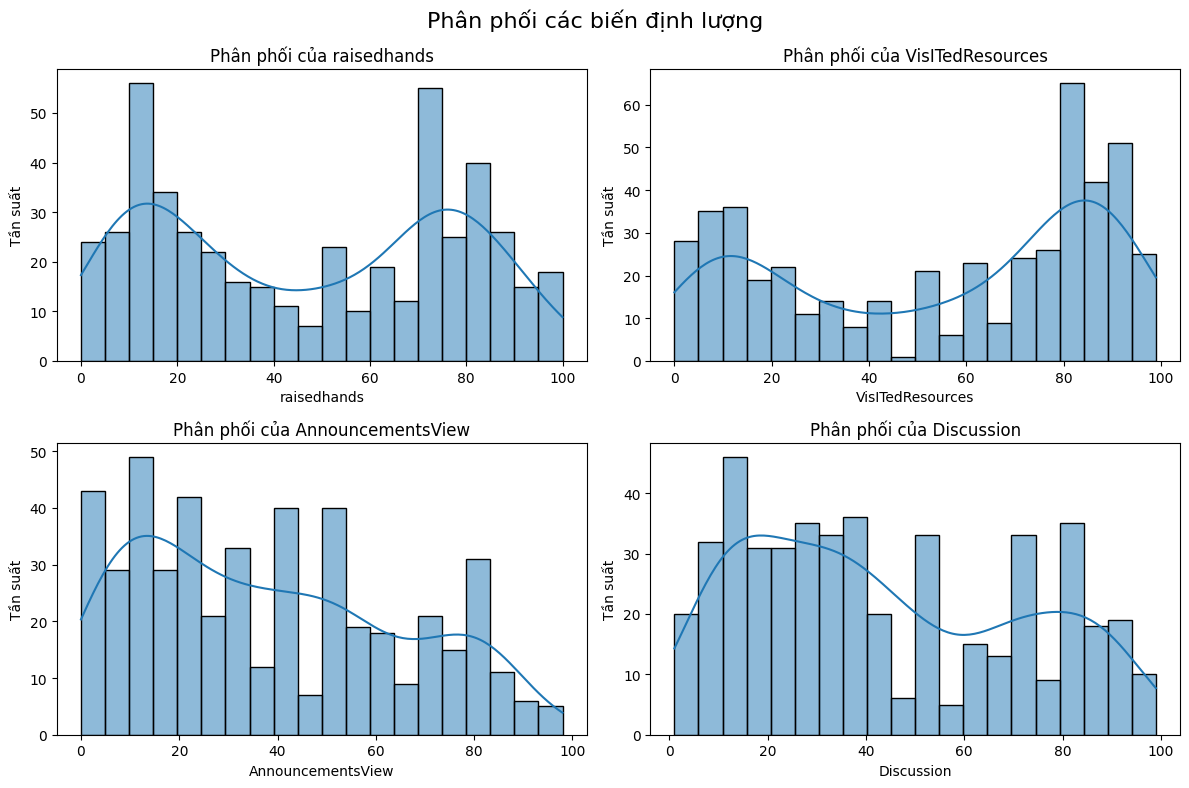

In [ ]:
# --- 1. Phân phối các biến định lượng ---
num_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# Create subplots for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, ax=axes[i], kde=True)  # Using seaborn for better aesthetics and kde
    axes[i].set_title(f"Phân phối của {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Tần suất", fontsize=10)

plt.suptitle("Phân phối các biến định lượng", fontsize=16)
plt.tight_layout()
plt.show()

Dữ liệu thống kê cho thấy sự phân hóa rõ rệt giữa các học sinh trong mức độ tham gia học tập và chủ động trong quá trình học. Cụ thể, ở biến "raisedhands", nhiều học sinh chỉ giơ tay phát biểu rất ít (khoảng 10–20 lần), cho thấy sự thiếu tự tin hoặc thái độ học tập thụ động. Trong khi đó, một nhóm khác lại rất chủ động, thường xuyên phát biểu (70–80 lần trở lên), phản ánh sự tích cực và hứng thú với bài học.

Tương tự, biến "VisITedResources" cũng thể hiện rõ hai nhóm học sinh: một nhóm ít truy cập tài liệu học tập (dưới 30 lần), có thể chưa hình thành thói quen tự học; và nhóm còn lại rất siêng năng, truy cập thường xuyên (trên 80 lần), thể hiện tinh thần học tập chủ động và nghiêm túc.
Biến "AnnouncementsView" cho thấy phần lớn học sinh không quan tâm nhiều đến việc theo dõi thông báo, thể hiện qua số lần xem rất ít. Ngược lại, một số em xem rất nhiều lần, cho thấy sự cẩn thận và tinh thần theo sát thông tin học tập từ nhà trường.

Cuối cùng, ở biến "Discussion", phần lớn học sinh tham gia thảo luận rất ít (0–20 lần), điều này phản ánh sự thiếu tích cực trong việc trao đổi và hợp tác trong lớp học. Tuy nhiên, cũng có một nhóm nhỏ học sinh rất năng động, với số lần thảo luận cao (70–90 lần), thể hiện kỹ năng giao tiếp và tinh thần hợp tác tốt.

Từ những quan sát này, có thể rút ra rằng mức độ chủ động, tự học và tham gia hoạt động học tập giữa các học sinh còn khá chênh lệch. Điều này đặt ra yêu cầu cần điều chỉnh phương pháp giảng dạy theo hướng khuyến khích học sinh tự tin hơn, tích cực trao đổi, rèn luyện kỹ năng tự học và thường xuyên tương tác với các tài nguyên học tập – từ đó nâng cao hiệu quả giáo dục toàn diện.




# 3.2.2.Phân phối các biến phân loại

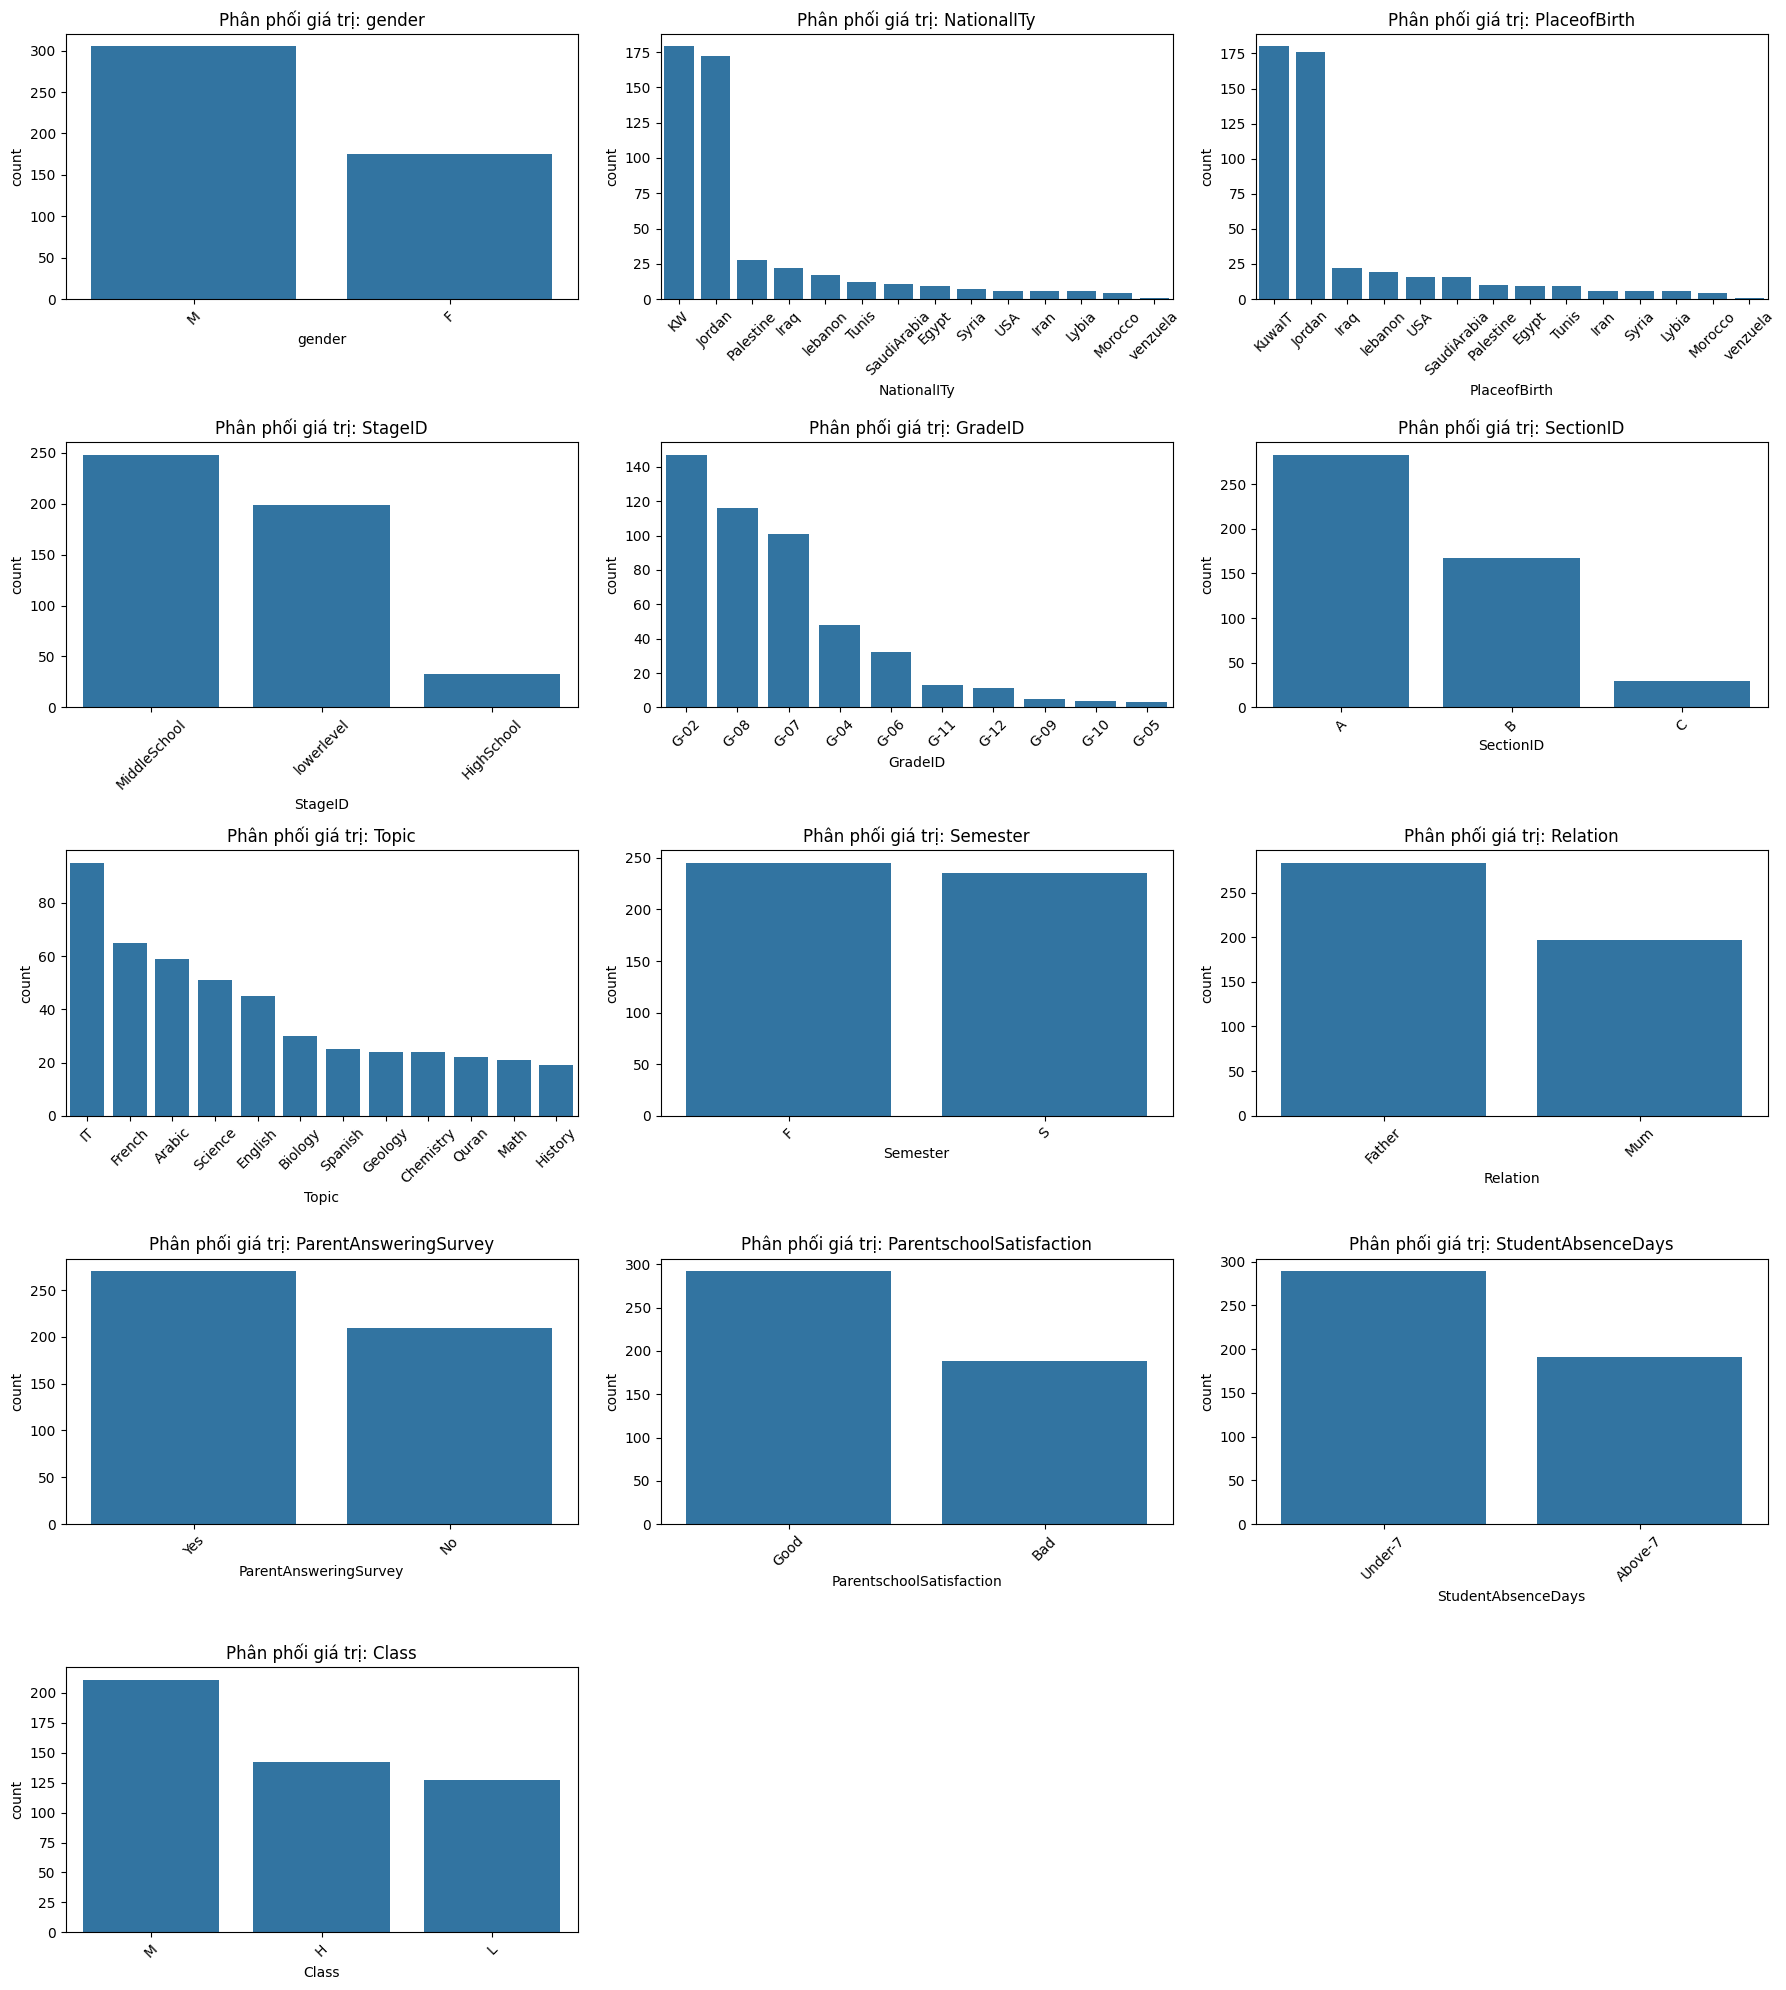

In [ ]:
# --- 2. Đếm số lượng các giá trị ở biến phân loại ---
cat_cols = df.select_dtypes(include='object').columns
num_cols = len(cat_cols)
num_rows = math.ceil(num_cols / 3)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Phân phối giá trị: {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Hide any unused subplots
for j in range(num_cols, num_rows * 3):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Dữ liệu cho thấy sự đa dạng và phân hóa rõ rệt trong nhiều yếu tố liên quan đến học sinh. Về giới tính, học sinh nam chiếm ưu thế với khoảng 300 em, gần gấp đôi so với nữ, điều này có thể ảnh hưởng đến môi trường học tập và cách giao tiếp trong lớp.

Xét về quốc tịch và nơi sinh, phần lớn học sinh là người Kuwait và sinh ra tại Kuwait, cho thấy tính đặc thù vùng miền cao và sự ổn định dân cư rõ rệt. Các quốc tịch khác như Jordan, Saudi Arabia, Lebanon, Iran,... chiếm tỷ lệ thấp.

Về cấp học, học sinh trung học chiếm đa số, với khoảng 200 em ở bậc Middle và High School, trong khi bậc tiểu học chỉ có khoảng 30 học sinh. Điều này phù hợp với mục tiêu phân tích hành vi học tập. Các lớp như G-02, G-04 và G-06 có số lượng học sinh vượt trội, còn các lớp khác phân bố thưa hơn, đặt ra yêu cầu chuẩn hóa dữ liệu nếu phân tích theo lớp.

Lớp học phần (SectionID) cũng có sự chênh lệch lớn: Section A chiếm khoảng 280 học sinh, cao hơn hẳn so với Section B và C. Việc này có thể ảnh hưởng đến kết quả học tập và cần xem xét khi phân tích sâu hơn.

Về môn học, các môn như  IT, Arabic, Science, English và Math thu hút nhiều học sinh hơn, trong khi các môn như History, Chemistry và French ít học sinh lựa chọn, cho thấy sự tập trung vào các môn học chính.

Học sinh được phân bố khá đều ở hai học kỳ, đảm bảo tính đại diện cho phân tích theo thời gian. Về người giám hộ, phần lớn học sinh do cha giám hộ, phản ánh vai trò truyền thống trong gia đình.

Tỷ lệ phụ huynh trả lời khảo sát cao (~250 người), cùng với đa số phụ huynh cảm thấy hài lòng với trường học, cho thấy sự quan tâm tích cực đến quá trình học tập của con em.

Về ngày nghỉ học, khoảng 310 học sinh nghỉ dưới 7 ngày, phản ánh tính chuyên cần tốt, tuy nhiên vẫn có khoảng 170 em nghỉ nhiều, cần lưu ý để tránh ảnh hưởng đến kết quả học tập.

Cuối cùng, phân tích học lực cho thấy khoảng 200 học sinh có học lực trung bình, 150 học sinh giỏi và 140 học sinh yếu. Dù sự phân bố khá đồng đều, nhưng số học sinh giỏi vẫn còn thấp, đặt ra yêu cầu nâng cao chất lượng và hiệu quả giảng dạy trong thời gian tới.



# 3.2.3.3. Ma trận tương quan giữa các biến số

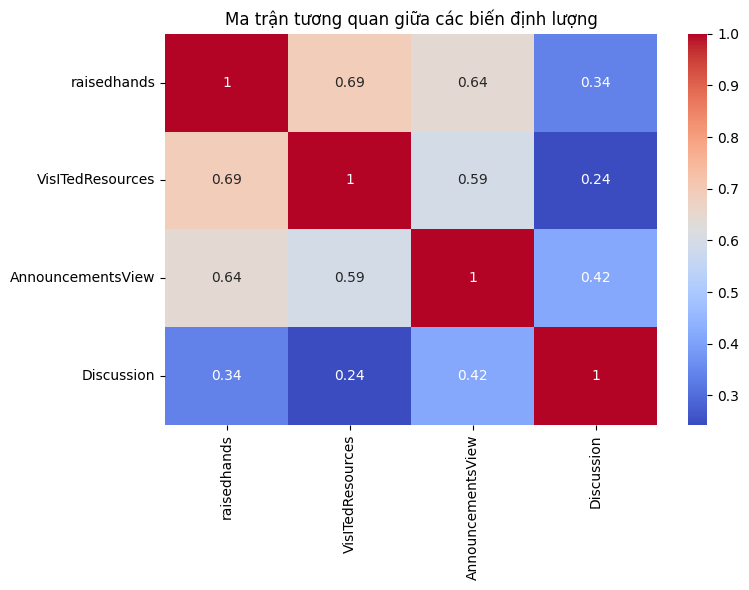

In [ ]:
# --- 3. Ma trận tương quan giữa các biến số ---
plt.figure(figsize=(8, 6))

# num_cols is currently an int. Define the intended columns
num_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan giữa các biến định lượng")
plt.tight_layout()
plt.show()

Biểu đồ cho thấy mối quan hệ chặt chẽ giữa một số hành vi học tập. Cụ thể, hành vi giơ tay phát biểu có mối tương quan cao với việc truy cập tài nguyên học tập với hệ số tương quan là 0.69. Điều này cho thấy học sinh càng tích cực phát biểu thì cũng càng chủ động tìm kiếm tài liệu để học.

Tương tự, giơ tay phát biểu cũng có tương quan khá cao với việc xem thông báo đạt mức 0.64, cho thấy các học sinh năng động thường đồng thời theo dõi thông báo lớp học sát sao.

Trong khi đó, biến thảo luận lại có mối tương quan thấp với các biến còn lại, đặc biệt là với biến truy cập tài nguyên học tập chỉ đạt 0.24. Điều này có thể ngụ ý rằng học sinh tham gia thảo luận không nhất thiết là những người hay truy cập tài nguyên hoặc giơ tay trong lớp.

Tóm lại, biểu đồ này phản ánh rằng các hành vi như phát biểu, xem thông báo và truy cập tài liệu học tập có mối liên hệ tích cực với nhau, trong khi hoạt động thảo luận lại mang tính độc lập hơn với các hành vi còn lại. Đây là cơ sở quan trọng để giáo viên nhận biết nhóm học sinh năng động và đề xuất các biện pháp hỗ trợ phù hợp cho những học sinh ít tham gia vào các hoạt động học tập.


# 3.2.4.Phân Tích So Sánh Học Sinh Theo Giới Tính, Quốc Tịch và Học Lực

In [ ]:
# --- 4. So sánh trung bình hoạt động học tập theo giới tính ---
print("Trung bình theo giới tính:")
print(df.groupby('gender')[num_cols].mean())

Trung bình theo giới tính:
        raisedhands  VisITedResources  AnnouncementsView  Discussion
gender                                                              
F         52.862857         64.000000          39.748571   47.828571
M         43.281967         49.518033          36.868852   40.675410


Qua thống kê trung bình theo giới tính, ta nhận thấy học sinh nữ có mức độ tham gia học tập tích cực hơn học sinh nam ở tất cả các chỉ số:
- Số lần giơ tay phát biểu: Nữ sinh có trung bình 52.86 lần, cao hơn đáng kể so với nam sinh là 43.28 lần. Điều này cho thấy học sinh nữ có xu hướng chủ động và tích cực tham gia phát biểu trong lớp học hơn.
- Số lần truy cập tài nguyên học tập: Trung bình của nữ sinh là 64 lần, trong khi nam sinh chỉ là 49.52 lần. Điều này phản ánh rằng nữ sinh quan tâm hơn đến việc tự học và tìm kiếm thông tin học tập.
- Số lần xem thông báo : Dù sự chênh lệch không lớn, nữ sinh vẫn cao hơn (39.75 so với 36.87), cho thấy mức độ chủ động trong việc cập nhật thông tin học tập.
- Mức độ tham gia thảo luận: Nữ sinh tham gia thảo luận nhiều hơn (47.83 so với 40.68), phản ánh sự gắn kết và tương tác học thuật cao hơn từ phía các bạn nữ.

Tổng thể, học sinh nữ có xu hướng học tập tích cực, chủ động và tương tác nhiều hơn so với học sinh nam. Đây có thể là cơ sở để giáo viên điều chỉnh phương pháp giảng dạy, hỗ trợ phù hợp với từng nhóm đối tượng nhằm nâng cao hiệu quả giảng dạy.


In [ ]:
# --- 5. So sánh theo quốc tịch (5 quốc tịch phổ biến nhất) ---
top_nations = df['NationalITy'].value_counts().head(5).index
print("\nTrung bình theo quốc tịch (Top 5):")
print(df[df['NationalITy'].isin(top_nations)].groupby('NationalITy')[num_cols].mean())


Trung bình theo quốc tịch (Top 5):
             raisedhands  VisITedResources  AnnouncementsView  Discussion
NationalITy                                                              
Iraq           73.772727         83.863636          56.636364   50.272727
Jordan         48.860465         63.255814          42.406977   43.034884
KW             36.469274         40.558659          26.832402   43.966480
Palestine      81.535714         76.107143          59.678571   52.964286
lebanon        62.117647         63.176471          43.705882   33.294118


Qua thống kê trung bình, ta nhận thấy có sự khác biệt rõ rệt về mức độ tham gia học tập của học sinh đến từ các quốc tịch khác nhau:

Học sinh Palestine và Iraq thể hiện mức độ tham gia học tập nổi bật nhất. Cụ thể:
- Palestine có giá trị trung bình cao nhất về số lần giơ tay phát biểu (81.54) và thảo luận (52.96), cho thấy học sinh quốc tịch này rất tích cực tham gia vào các hoạt động trong lớp học.
- Iraq lại dẫn đầu về số lần truy cập tài nguyên học tập (83.86) và cũng có chỉ số xem thông báo (56.64) và giơ tay (73.77) rất cao, phản ánh sự chủ động và nghiêm túc trong việc học.

Lebanon và Jordan có mức độ học tập khá:
- Học sinh Lebanon có chỉ số giơ tay (62.12) và truy cập tài nguyên (63.18) tương đối cao, nhưng tham gia thảo luận thấp hơn (33.29).
- Jordan có sự đồng đều giữa các chỉ số, thể hiện sự tham gia tương đối cân bằng.

Học sinh Kuwait (KW) có mức trung bình thấp nhất ở hầu hết các chỉ số: Đặc biệt là chỉ số giơ tay (36.47) và xem thông báo (26.83) khá thấp, điều này cho thấy nhóm học sinh này có thể chưa thật sự chủ động trong việc học và tương tác lớp học.

Kết luận: Sự khác biệt giữa các quốc tịch là một yếu tố quan trọng cần lưu ý trong giảng dạy, từ đó giáo viên có thể xây dựng chiến lược hỗ trợ phù hợp, khuyến khích những nhóm học sinh ít tham gia trở nên tích cực hơn và phát huy điểm mạnh của từng nhóm học sinh theo nền văn hóa và thói quen học tập.




In [ ]:
# --- 6. So sánh hoạt động học tập theo học lực (Class) ---
print("\nTrung bình theo mức học lực (Class):")
print(df.groupby('Class')[num_cols].mean())


Trung bình theo mức học lực (Class):
       raisedhands  VisITedResources  AnnouncementsView  Discussion
Class                                                              
H        70.288732         78.746479          53.380282   53.661972
L        16.889764         18.322835          15.574803   30.834646
M        48.938389         60.635071          40.962085   43.791469


Kết quả phân tích mức độ tham gia học tập cho thấy sự khác biệt rõ rệt giữa các nhóm học sinh theo học lực.

Nhóm học sinh giỏi thể hiện sự chủ động vượt trội với các chỉ số tham gia cao nhất. Cụ thể, trung bình số lần giơ tay là 70.29, truy cập tài nguyên học tập đạt 78.75 lần, xem thông báo 53.38 lần và thảo luận 53.66 lần. Những con số này phản ánh sự tích cực, chủ động của nhóm học sinh này trong quá trình học tập cũng như tương tác với giáo viên và bài giảng.

Học sinh khá tuy có mức độ tham gia không cao bằng nhóm học sinh giỏi, nhưng vẫn duy trì ở mức tương đối. Các chỉ số như số lần giơ tay (48.94) và thảo luận (43.79) cho thấy nhóm này vẫn tích cực trong việc tiếp thu bài và trao đổi thông tin.

Ngược lại, nhóm học sinh yếu có mức độ tham gia thấp nhất. Trung bình số lần giơ tay chỉ là 16.89, truy cập tài nguyên là 18.32 và xem thông báo là 15.57. Tuy nhiên, chỉ số thảo luận đạt 30.83 cho thấy vẫn còn một bộ phận học sinh yếu có nhu cầu giao tiếp, có thể là để tìm kiếm sự hỗ trợ trong học tập.

Tổng thể, dữ liệu cho thấy rằng mức độ tham gia vào các hoạt động học tập có xu hướng tỉ lệ thuận với học lực. Do đó, để cải thiện kết quả học tập chung, cần có các biện pháp khuyến khích sự chủ động từ học sinh, đặc biệt là tập trung hỗ trợ nhóm học sinh yếu nâng cao sự tham gia và tiếp cận bài giảng hiệu quả hơn.



# 3.3.Xác định các đặc trưng quan trọng có ảnh hưởng lớn đến kết quả học tập và hành vi của học sinh.

<ipython-input-14-88cabe6c266e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Set2', ax=axes[i]) # Plot on each subplot
<ipython-input-14-88cabe6c266e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Set2', ax=axes[i]) # Plot on each subplot
<ipython-input-14-88cabe6c266e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=col, data=df, palette='Set2', ax=axes[i]) # Plot on each subplot
<ipython-input-14-88cabe6c266e>:6: FutureWarning: 

Passing `palette` 

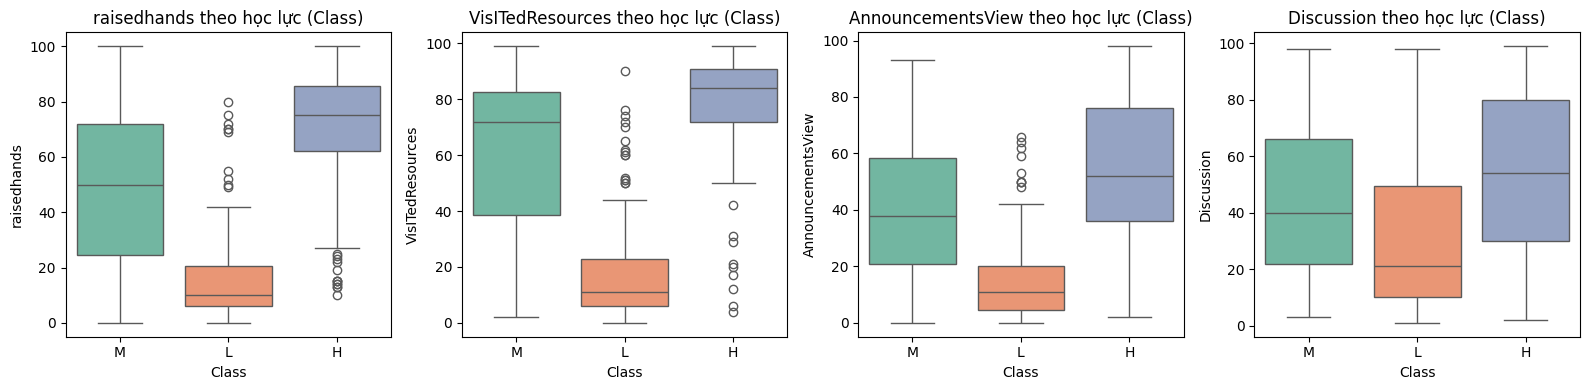

In [ ]:
# --- 1. Boxplot: Hành vi học tập theo học lực ---
behavior_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
fig, axes = plt.subplots(1, len(behavior_cols), figsize=(16, 4)) # Create a single row with 4 subplots

for i, col in enumerate(behavior_cols):
    sns.boxplot(x='Class', y=col, data=df, palette='Set2', ax=axes[i]) # Plot on each subplot
    axes[i].set_title(f'{col} theo học lực (Class)')
    axes[i].set_xlabel('Class')  # Set x-axis label
    axes[i].set_ylabel(col)  # Set y-axis label

plt.tight_layout()
plt.show()


Dựa trên biểu đồ hộp, có thể nhận thấy rõ sự khác biệt trong hành vi học tập giữa các nhóm học sinh theo mức học lực. Cụ thể, học sinh thuộc nhóm học lực giỏi có xu hướng học tập tích cực và chủ động hơn hẳn. Họ thường xuyên giơ tay phát biểu, truy cập tài liệu học tập, xem thông báo học tập và tham gia các buổi thảo luận với tần suất cao. Điều này cho thấy nhóm học sinh giỏi không chỉ tiếp thu kiến thức tốt mà còn rất chủ động tương tác trong môi trường học tập.

Trong khi đó, học sinh nhóm khá cũng thể hiện mức độ tham gia tương đối tích cực, tuy nhiên mức độ có phần thấp hơn so với nhóm giỏi và phân tán hơn về mặt tần suất. Ngược lại, nhóm học sinh yếu thể hiện mức độ tham gia rất thấp ở cả bốn hoạt động trên, đặc biệt là trong việc giơ tay phát biểu và truy cập tài nguyên học tập – phần lớn các em chỉ tham gia ở mức tối thiểu. Tuy nhiên, cũng có một số trường hợp cá biệt trong nhóm yếu vẫn tích cực tham gia thảo luận, điều này có thể cho thấy sự nỗ lực cải thiện của các em hoặc mong muốn được hỗ trợ.

Tổng thể, biểu đồ cho thấy mối liên hệ rõ ràng giữa hành vi học tập và kết quả học tập. Những hành vi như chủ động phát biểu, truy cập tài nguyên, theo dõi thông báo và tham gia thảo luận có thể là dấu hiệu tích cực dự báo học lực cao, đồng thời cũng là cơ sở quan trọng để nhà trường phát hiện sớm học sinh gặp khó khăn, từ đó có những biện pháp hỗ trợ phù hợp


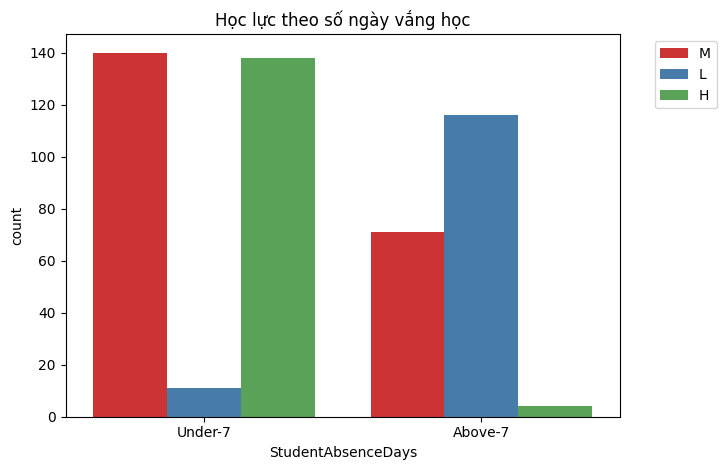

In [ ]:
# --- 2. Barplot: Phân phối học lực theo số ngày vắng ---
plt.figure()
sns.countplot(data=df, x='StudentAbsenceDays', hue='Class', palette='Set1')
plt.title('Học lực theo số ngày vắng học')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Biểu đồ trên phản ánh mối tương quan giữa số ngày vắng học và kết quả học lực của học sinh thông qua hai nhóm phân loại: nhóm học sinh vắng học dưới 7 ngày  và nhóm học sinh vắng học trên 7 ngày.

Dựa vào biểu đồ, có thể nhận thấy rằng nhóm học sinh vắng học dưới 7 ngày chiếm ưu thế rõ rệt về tỷ lệ học sinh có kết quả học tập tốt. Cụ thể, trong nhóm này:

- Khoảng 48.6% học sinh đạt học lực trung bình
- Khoảng 47.9% đạt học lực giỏi
- Chỉ có khoảng 3.5% học sinh thuộc nhóm học lực yếu.

Điều này cho thấy, phần lớn học sinh có số ngày nghỉ học thấp đều có kết quả học tập ổn định, thậm chí xuất sắc. Mức độ chuyên cần (đi học đều đặn, ít nghỉ) có liên hệ chặt chẽ với hiệu suất học tập tốt, bởi sự hiện diện thường xuyên trên lớp giúp học sinh tiếp thu bài giảng đầy đủ, kịp thời làm bài tập và tham gia các hoạt động học tập tích cực.

Ngược lại, tình trạng học sinh vắng học trên 7 ngày dẫn đến kết quả học tập kém hơn rõ rệt. Trong nhóm học sinh này:
- Tỷ lệ học sinh đạt học lực yếu chiếm tới 60.5%,
- Tỷ lệ trung bình giảm xuống còn 36.8%,
- Trong khi đó, tỷ lệ giỏi gần như không đáng kể, chỉ ở mức 2.6%.

Điều này phản ánh một thực trạng đáng lo ngại: học sinh vắng học nhiều ngày có nguy cơ rất cao rơi vào nhóm học lực yếu. Nguyên nhân có thể do việc nghỉ học nhiều làm gián đoạn quá trình tiếp thu kiến thức, giảm sự gắn kết với bài học và mất dần động lực học tập. Khi khoảng cách kiến thức bị kéo dài, học sinh dễ rơi vào trạng thái mất căn bản, dẫn đến kết quả học tập đi xuống rõ rệt.

Như vậy việc đi học đều là một yếu tố cực kỳ quan trọng để duy trì và nâng cao thành tích học tập. Việc hạn chế vắng học không chỉ giúp học sinh hiểu bài hơn mà còn tăng khả năng đạt được thành tích xuất sắc.








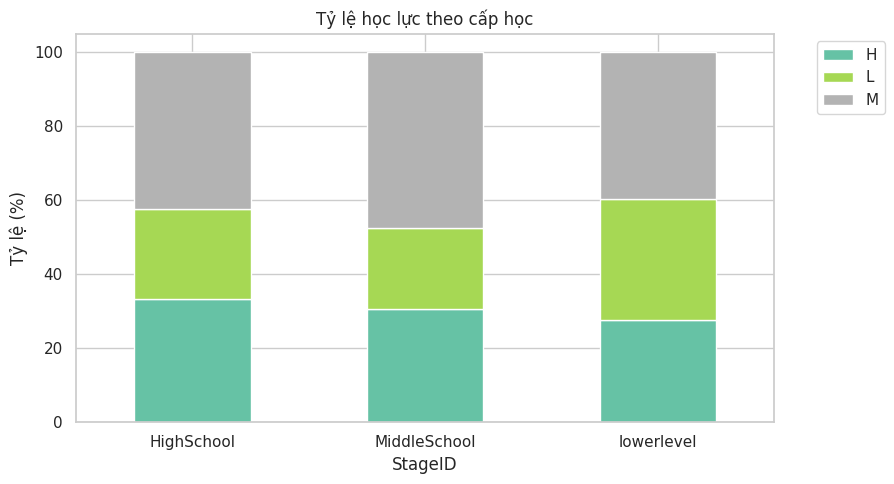

In [ ]:
# Thiết lập hiển thị
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# 4. Tỷ lệ học lực theo cấp học
stage_class = pd.crosstab(df['StageID'], df['Class'], normalize='index') * 100
stage_class.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Tỷ lệ học lực theo cấp học")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=0)
plt.tight_layout()
# Thêm chú thích và đặt vị trí
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Biểu đồ trên thể hiện tỷ lệ học lực của học sinh theo từng cấp học với ba nhóm học lực chính:

- Biểu đồ cho thấy rằng khi học sinh chuyển từ cấp học thấp lên cấp học cao hơn, tỷ lệ học sinh giỏi có xu hướng tăng dần. Cụ thể, tỷ lệ học sinh giỏi ở tiểu học là thấp nhất, tăng lên ở cấp THCS  và cao nhất ở cấp THPT. Điều này phản ánh quá trình học tập và phát triển năng lực qua thời gian, đồng thời cũng có thể cho thấy sự "chắt lọc" tự nhiên – chỉ những học sinh có khả năng tốt hơn mới tiếp tục học lên cao.
- Ngược lại, tỷ lệ học sinh yếu lại giảm dần từ cấp tiểu học đến cấp THCS và THPT. Điều này cho thấy rằng đa số học sinh yếu dần được hỗ trợ cải thiện hoặc không tiếp tục theo học lên các cấp cao hơn.
- Trong khi đó, tỷ lệ học sinh trung bình chiếm tỷ lệ cao nhất ở cấp THCS, cho thấy đây là giai đoạn bản lề – nơi học sinh đang chuyển giao về cả mặt tâm lý và học lực, dễ rơi vào trạng thái trung bình nếu không có sự hỗ trợ phù hợp.

Tóm lại, biểu đồ cho thấy một xu hướng tích cực là học lực của học sinh có xu hướng cải thiện qua các cấp học. Tuy nhiên, vẫn tồn tại một nhóm học sinh yếu duy trì đến cấp THPT, cho thấy cần có giải pháp hỗ trợ sớm và liên tục để các em không bị bỏ lại phía sau trong quá trình học tập.




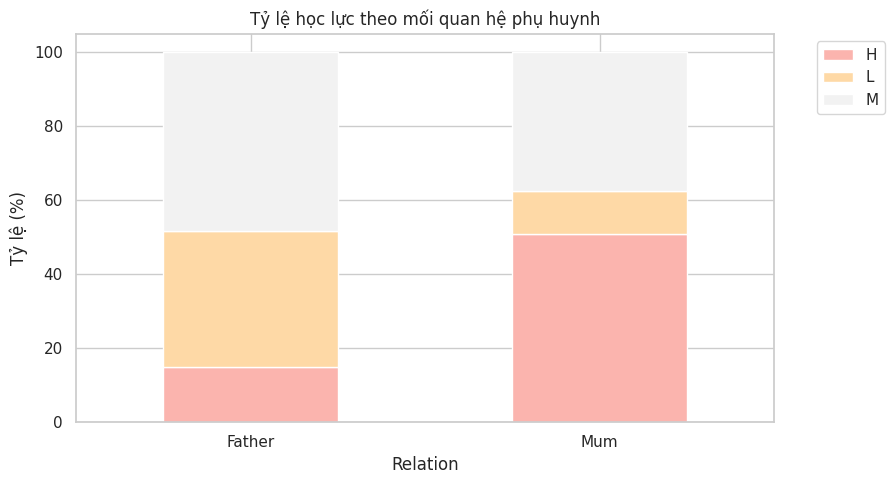

In [ ]:
# 5. Tỷ lệ học lực theo mối quan hệ phụ huynh
relation_class = pd.crosstab(df['Relation'], df['Class'], normalize='index') * 100
relation_class.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.title("Tỷ lệ học lực theo mối quan hệ phụ huynh")
plt.ylabel("Tỷ lệ (%)")
plt.xticks(rotation=0)
plt.tight_layout()
# Thêm chú thích và đặt vị trí
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Kết quả phân tích mối liên hệ giữa người giám hộ và học lực học sinh cho thấy sự khác biệt đáng kể về thành tích học tập giữa các nhóm học sinh sống với mẹ và sống với cha.

Đối với nhóm học sinh sống với mẹ, tỷ lệ học sinh giỏi chiếm hơn 50% — mức cao vượt trội so với các nhóm còn lại. Đồng thời, tỷ lệ học sinh yếu trong nhóm này là thấp nhất, chỉ dưới 15%, trong khi nhóm học sinh trung bình duy trì ở mức trung bình. Điều này phản ánh rằng học sinh sống với mẹ có xu hướng học tốt hơn, có thể do nhận được sự quan tâm, chăm sóc kỹ lưỡng hơn cũng như môi trường học tập tích cực hơn từ phía người mẹ.

Ngược lại, nhóm học sinh sống với cha thể hiện một bức tranh kém tích cực hơn. Tỷ lệ học sinh yếu trong nhóm này chiếm khoảng 35–40% — cao nhất trong các nhóm, trong khi tỷ lệ học sinh giỏi lại khá thấp, chỉ khoảng 15%. Tỷ lệ học sinh trung bình chiếm gần một nửa. Điều này cho thấy học sinh sống với cha có xu hướng gặp nhiều khó khăn hơn trong học tập, có thể xuất phát từ việc thiếu sự đồng hành sát sao trong quá trình học hoặc những yếu tố khác trong môi trường gia đình.

Nhìn chung, biểu đồ cho thấy rằng người giám hộ có ảnh hưởng nhất định đến học lực của học sinh. Học sinh sống với mẹ thường có kết quả học tập tốt hơn. Đây là một yếu tố quan trọng mà nhà trường, phụ huynh và các nhà làm chính sách giáo dục cần lưu ý, đặc biệt trong việc xây dựng các chương trình hỗ trợ học sinh đến từ các gia đình có hoàn cảnh đặc biệt hoặc chỉ có một phụ huynh chăm sóc.


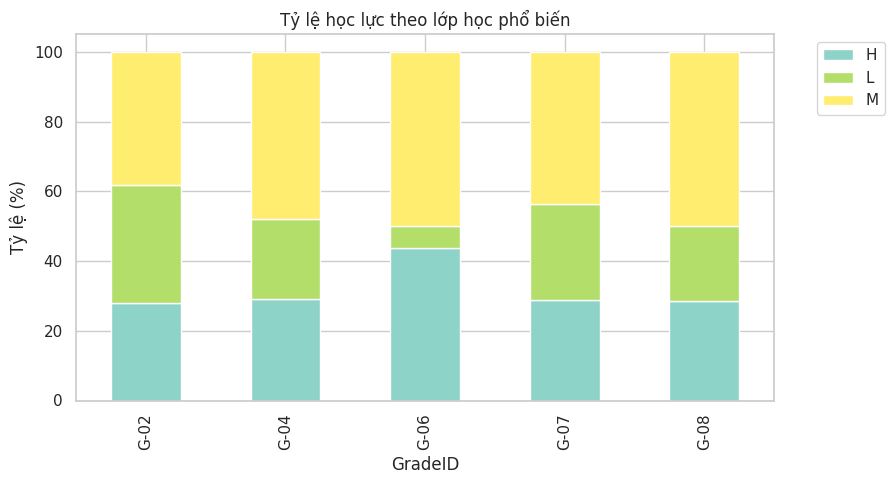

In [ ]:
# 6. Tỷ lệ học lực theo lớp học phổ biến
top_grades = df['GradeID'].value_counts().head(5).index
grade_class = pd.crosstab(df[df['GradeID'].isin(top_grades)]['GradeID'], df['Class'], normalize='index') * 100
grade_class.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Tỷ lệ học lực theo lớp học phổ biến")
plt.ylabel("Tỷ lệ (%)")
plt.tight_layout()
# Thêm chú thích và đặt vị trí
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Biểu đồ "Tỷ lệ học lực theo lớp học phổ biến" cho thấy sự phân bố học lực của học sinh ở các lớp G-02, G-04, G-06, G-07 và G-08, được thể hiện dưới dạng phần trăm.

- Lớp G-06 nổi bật nhất với tỷ lệ học sinh giỏi cao nhất (hơn 40%) và học sinh yếu thấp nhất (dưới 10%). Điều này cho thấy đây là lớp có thành tích học tập tốt nhất trong số các lớp được khảo sát.
- Lớp G-02 có tỷ lệ học sinh yếu cao nhất (hơn 30%), trong khi tỷ lệ học sinh giỏi chỉ ở mức trung bình (~28%). Điều này cho thấy đây là lớp có nhiều học sinh gặp khó khăn trong học tập và cần được hỗ trợ thêm.
- Lớp G-04 và G-08 có tỷ lệ học sinh trung bình cao nhất (xấp xỉ hoặc trên 50%), cho thấy đa số học sinh trong hai lớp này có kết quả học tập ở mức khá, tuy nhiên thiếu sự nổi bật ở nhóm giỏi.
- Lớp G-07 có sự phân bố tương đối đồng đều giữa ba nhóm học lực, không có nhóm nào vượt trội rõ rệt. Đây là lớp có mức độ học tập trung bình.

Tổng thể, biểu đồ phản ánh sự chênh lệch rõ rệt về kết quả học tập giữa các lớp. Lớp G-06 nổi bật với kết quả tốt, trong khi lớp G-02 là lớp cần chú trọng cải thiện chất lượng học tập. Các lớp còn lại chủ yếu tập trung ở mức học lực trung bình.


<ipython-input-19-a93647547f08>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='ParentAnsweringSurvey', y='raisedhands', hue='Class', estimator='mean', ci=None, palette='Set2')


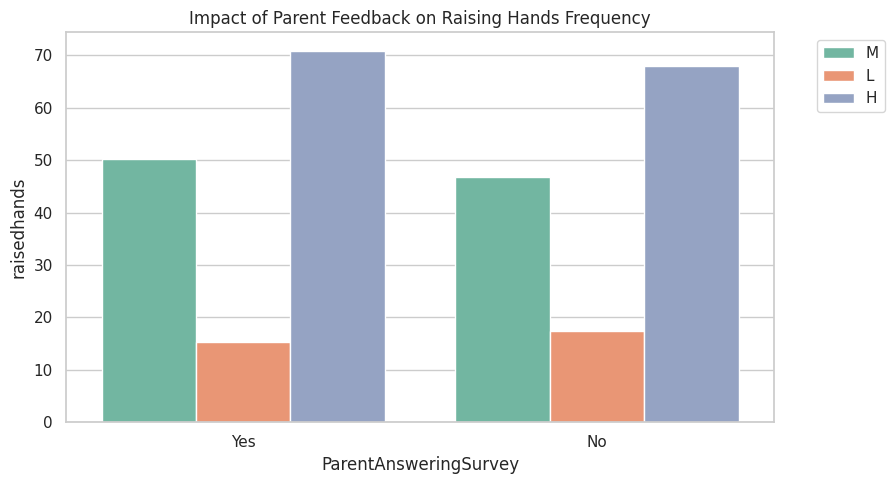

In [ ]:
# --- 3. Barplot: Tác động của việc phụ huynh trả lời khảo sát ---
plt.figure()
sns.barplot(data=df, x='ParentAnsweringSurvey', y='raisedhands', hue='Class', estimator='mean', ci=None, palette='Set2')
plt.title('Impact of Parent Feedback on Raising Hands Frequency')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Biểu đồ trên mô tả mối quan hệ giữa việc phụ huynh tham gia trả lời khảo sát của nhà trường và mức độ chủ động học tập của học sinh, được thể hiện thông qua số lần giơ tay trong lớp. Dữ liệu được phân chia thành hai nhóm: phụ huynh tham gia khảo sát và phụ huynh không tham gia, đồng thời phân loại học sinh theo mức học lực.

Kết quả phân tích cho thấy, ở nhóm phụ huynh có tham gia khảo sát, học sinh có xu hướng thể hiện sự chủ động cao hơn trong lớp học. Cụ thể, học sinh đạt học lực giỏi  có số lần giơ tay rất cao, xấp xỉ 70 lần. Học sinh học lực trung bình cũng có mức độ tham gia khá tích cực, với khoảng 50 lần giơ tay. Ngược lại, nhóm học sinh học lực yếu chỉ giơ tay khoảng 15 lần, cho thấy mức độ chủ động thấp, gần như không thay đổi so với nhóm phụ huynh không tham gia khảo sát.

Ở nhóm phụ huynh không tham gia khảo sát, mức độ giơ tay của học sinh học lực giỏi giảm nhẹ nhưng vẫn duy trì ở mức cao (~68 lần), cho thấy rằng đối với học sinh có học lực tốt, việc phụ huynh có tham gia hay không tham gia khảo sát dường như không ảnh hưởng nhiều đến sự chủ động của các em trong lớp học. Tuy nhiên, đối với học sinh học lực trung bìn, số lần giơ tay có xu hướng giảm khi phụ huynh không tham gia khảo sát, từ khoảng 50 lần xuống còn 47 lần. Điều này gợi ý rằng sự quan tâm của phụ huynh có thể đóng vai trò như một yếu tố khích lệ tinh thần, giúp học sinh trung bình tích cực tham gia hơn vào các hoạt động học tập trên lớp.

Đáng chú ý, với nhóm học sinh học lực yếu, mức độ giơ tay gần như không thay đổi dù phụ huynh có tham gia khảo sát hay không. Điều này cho thấy, sự quan tâm từ phía gia đình, thông qua các hình thức gián tiếp như trả lời khảo sát, không đủ để thúc đẩy sự chủ động học tập ở nhóm đối tượng này. Các em học sinh yếu có thể đang đối mặt với những khó khăn học tập sâu hơn, đòi hỏi phải có những can thiệp trực tiếp hơn như các chương trình kèm cặp cá nhân hóa, hỗ trợ tâm lý học đường, hoặc các chiến lược giảng dạy đặc biệt.

Nhìn tổng thể, dữ liệu cho thấy rằng sự quan tâm của phụ huynh, dù chỉ thể hiện qua việc tham gia khảo sát, vẫn có những ảnh hưởng tích cực đến mức độ chủ động của học sinh, đặc biệt là nhóm học sinh học lực trung bình. Điều này nhấn mạnh vai trò quan trọng của mối liên kết giữa nhà trường và gia đình trong việc hỗ trợ quá trình học tập và phát triển của học sinh. Tuy nhiên, đồng thời, dữ liệu cũng cho thấy sự cần thiết phải có những giải pháp toàn diện và chuyên sâu hơn để hỗ trợ những học sinh đang gặp khó khăn trong học tập.


# 4.Tiền xử lý dữ liệu

# 4.1.Xử lý giá trị thiếu

In [ ]:
# Kiểm tra tổng số giá trị thiếu trên từng cột
print(df.isnull().sum())


gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


Kết quả cho thấy tất cả các cột đều không có giá trị bị thiếu, tức là không có ô dữ liệu nào bị để trống. Điều này cho phép thực hiện các bước xử lý và phân tích tiếp theo mà không cần phải thực hiện các thao tác như loại bỏ hàng, điền giá trị trung bình hay nội suy.

# 4.2.Xử lý dữ liệu không hợp lệ.

In [ ]:
# Kiểm tra các giá trị duy nhất trong các cột phân loại
cat_cols = ['gender', 'NationalITy', 'StageID', 'GradeID', 'Semester',
            'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
            'StudentAbsenceDays', 'Class']

for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


gender: ['M' 'F']
NationalITy: ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
StageID: ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID: ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
Semester: ['F' 'S']
Relation: ['Father' 'Mum']
ParentAnsweringSurvey: ['Yes' 'No']
ParentschoolSatisfaction: ['Good' 'Bad']
StudentAbsenceDays: ['Under-7' 'Above-7']
Class: ['M' 'L' 'H']


Kết quả kiểm tra cho thấy đa số các giá trị trong các cột phân loại đều hợp lệ và mang tính nhất quán. Tuy nhiên, nhóm đã phát hiện một số điểm bất thường như sau:
- Cột NationalITy: Xuất hiện các giá trị như 'venzuela' và 'Lybia', đây là các lỗi chính tả của 'Venezuela' và 'Libya'. Những lỗi này cần được chuẩn hóa để tránh gây sai lệch khi mã hóa hoặc phân tích dữ liệu.
- Cột Relation: Có giá trị 'Mum', đây là cách viết không trang trọng. Để đảm bảo tính chuyên nghiệp và nhất quán, nên chuẩn hóa lại thành 'Mother'.

Còn các cột còn lại đều có giá trị hợp lệ.


In [ ]:
num_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

for col in num_cols:
    print(f"{col} - Số giá trị âm: {(df[col] < 0).sum()}")


raisedhands - Số giá trị âm: 0
VisITedResources - Số giá trị âm: 0
AnnouncementsView - Số giá trị âm: 0
Discussion - Số giá trị âm: 0


Kết quả kiểm tra cho thấy cả bốn cột đều không có giá trị âm. Điều này cho thấy dữ liệu đã được thu thập một cách hợp lý và không có lỗi nhập liệu nghiêm trọng trong các trường này.



# 4.3.Mã hóa bằng kỹ thuật Label Encoding



In [ ]:
# Sao chép dữ liệu để giữ bản gốc
df_encoded = df.copy()

# Các cột nhị phân hoặc có thể mã hóa thứ tự
label_cols = ['gender', 'Semester', 'Relation', 'ParentAnsweringSurvey',
              'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

# Gán encoder cho từng cột
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded.head())
print("Kích thước sau mã hóa:", df_encoded.shape)



   gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0       1          KW       KuwaIT  lowerlevel    G-04         A    IT   
1       1          KW       KuwaIT  lowerlevel    G-04         A    IT   
2       1          KW       KuwaIT  lowerlevel    G-04         A    IT   
3       1          KW       KuwaIT  lowerlevel    G-04         A    IT   
4       1          KW       KuwaIT  lowerlevel    G-04         A    IT   

   Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         0         0           15                16                  2   
1         0         0           20                20                  3   
2         0         0           10                 7                  0   
3         0         0           30                25                  5   
4         0         0           40                50                 12   

   Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0          20                      1  

Sau khi tiến hành mã hóa, dữ liệu đã được chuyển đổi hoàn toàn sang dạng số để phục vụ cho các thuật toán phân tích và phân cụm. Cụ thể, các cột như giới tính (gender), học kỳ (Semester), mối quan hệ với học sinh (Relation), phản hồi khảo sát của phụ huynh (ParentAnsweringSurvey), mức độ hài lòng với nhà trường (ParentschoolSatisfaction), số ngày nghỉ học (StudentAbsenceDays) và kết quả học tập (Class) đã được mã hóa thành các giá trị số.

Các đặc trưng định lượng như raisedhands (số lần giơ tay), VisITedResources (số lần truy cập tài nguyên), AnnouncementsView (xem thông báo) và Discussion (tham gia thảo luận) vẫn giữ nguyên giá trị và đều là các số không âm, phản ánh chính xác mức độ tham gia học tập của học sinh.


# 4.4.Mã hóa bằng kỹ thuật One-Hot Encoding.



In [ ]:
# One-hot encode các cột phân loại đa trị (không thứ tự)
onehot_cols = ['NationalITy', 'StageID', 'GradeID', 'SectionID']

df_encoded = pd.get_dummies(df_encoded, columns=onehot_cols, drop_first=True)

print(df_encoded.head())
print("Kích thước sau mã hóa:", df_encoded.shape)

   gender PlaceofBirth Topic  Semester  Relation  raisedhands  \
0       1       KuwaIT    IT         0         0           15   
1       1       KuwaIT    IT         0         0           20   
2       1       KuwaIT    IT         0         0           10   
3       1       KuwaIT    IT         0         0           30   
4       1       KuwaIT    IT         0         0           40   

   VisITedResources  AnnouncementsView  Discussion  ParentAnsweringSurvey  \
0                16                  2          20                      1   
1                20                  3          25                      1   
2                 7                  0          30                      0   
3                25                  5          35                      0   
4                50                 12          50                      0   

   ...  GradeID_G-05  GradeID_G-06  GradeID_G-07  GradeID_G-08  GradeID_G-09  \
0  ...         False         False         False         False    

Sau khi áp dụng kỹ thuật One-Hot Encoding cho các biến phân loại có nhiều mức giá trị (như GradeID, SectionID, v.v.), số lượng cột trong tập dữ liệu đã tăng lên rõ rệt – từ 17 lên 39 cột. Điều này là hoàn toàn hợp lý, vì One-Hot Encoding tạo ra một cột riêng biệt cho từng nhãn trong mỗi biến phân loại.Cụ thể:

- Các giá trị dạng chuỗi như GradeID, SectionID... đã được chuyển thành các cột mới với tên như GradeID_G-05, GradeID_G-06, SectionID_C, v.v. và biểu diễn bằng giá trị True/False.
- Những biến ban đầu như gender, Semester, Relation, ParentAnsweringSurvey... vẫn giữ dạng số nguyên như trước.
- Các biến định lượng như raisedhands, VisITedResources, AnnouncementsView, và Discussion không bị thay đổi, tiếp tục thể hiện số lần học sinh tương tác.


# 4.5.Chuẩn hóa dữ liệu bằng phương pháp Standard Scaler

In [ ]:
# Sao chép dữ liệu đã mã hóa
df_scaled_standard = df_encoded.copy()

# Chọn tất cả các cột dạng số để chuẩn hóa (loại trừ cột phân loại đã one-hot hoặc label encoded)
cols_to_scale = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# StandardScaler
standard_scaler = StandardScaler()
df_scaled_standard[cols_to_scale] = standard_scaler.fit_transform(df_scaled_standard[cols_to_scale])


print("\nDữ liệu sau Standard Scaling:")
print(df_scaled_standard[cols_to_scale].describe())



Dữ liệu sau Standard Scaling:
        raisedhands  VisITedResources  AnnouncementsView    Discussion
count  4.800000e+02      4.800000e+02       4.800000e+02  4.800000e+02
mean   4.440892e-17      5.921189e-17      -5.921189e-17  7.031412e-17
std    1.001043e+00      1.001043e+00       1.001043e+00  1.001043e+00
min   -1.521279e+00     -1.658255e+00      -1.426401e+00 -1.531509e+00
25%   -1.009037e+00     -1.053029e+00      -8.997589e-01 -8.433262e-01
50%    1.048878e-01      3.087281e-01      -1.850301e-01 -1.551430e-01
75%    9.179714e-01      8.836924e-01       7.554025e-01  9.676820e-01
max    1.731055e+00      1.337612e+00       2.260095e+00  2.018067e+00


Sau khi áp dụng phương pháp chuẩn hóa Standard Scaler, các biến định lượng bao gồm raisedhands, VisITedResources, AnnouncementsView và Discussion đã được đưa về cùng một thang đo. Cụ thể, mỗi đặc trưng được biến đổi sao cho có trung bình bằng 0 và độ lệch chuẩn bằng 1. Điều này giúp đảm bảo rằng các đặc trưng không bị ảnh hưởng bởi sự khác biệt về đơn vị đo lường hoặc độ lớn.

Kết quả cho thấy, giá trị trung bình của các cột sau chuẩn hóa đều rất gần 0, và độ lệch chuẩn xấp xỉ 1 – điều này cho thấy quá trình chuẩn hóa đã được thực hiện đúng cách. Ngoài ra, các giá trị sau khi chuẩn hóa nằm trong khoảng từ khoảng -1.6 đến hơn 2, thể hiện sự phân bố dữ liệu đồng đều quanh trung bình.


# 5. Giảm chiều dữ liệu bằng PCA

# 5.1.Áp dụng PCA (Principal Component Analysis)

In [ ]:
# Lấy dữ liệu chuẩn hóa (Standard Scaler) và loại bỏ cột mục tiêu (Class) nếu cần
features = df_scaled_standard.drop(columns=['Class'])  # 'Class' là biến mục tiêu
target = df_scaled_standard['Class']

# Chọn chỉ các cột số
features_numeric = features.select_dtypes(include=np.number)

# Áp dụng PCA, giữ lại 95% phương sai
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features_numeric)

print(f'Số thành phần giữ lại: {pca.n_components_}')

Số thành phần giữ lại: 8


# 5.2. Trực quan hóa tổng phương sai tích lũy

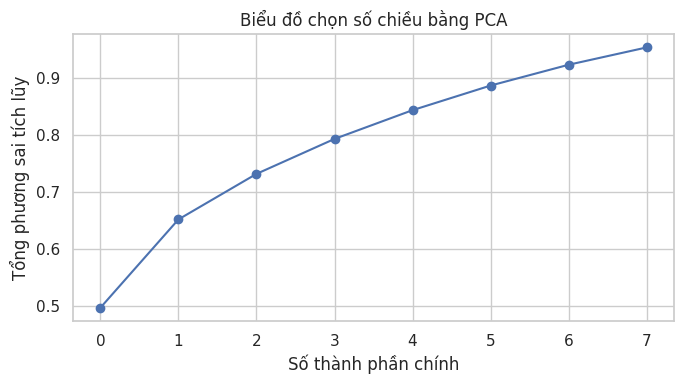

In [ ]:
# Vẽ biểu đồ phương sai tích lũy
plt.figure(figsize=(7, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tổng phương sai tích lũy')
plt.title('Biểu đồ chọn số chiều bằng PCA')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.3.Gộp lại thành DataFrame mới

In [ ]:
# Gộp lại thành DataFrame PCA + nhãn mục tiêu
df_pca = pd.DataFrame(features_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
df_pca['Class'] = target.values
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.060118 -0.208073 -0.360440 -0.599049 -0.808935  0.321615  0.315442   
1 -1.832968 -0.114529 -0.443156 -0.538943 -0.807243  0.360238  0.323145   
2 -2.620921  0.423844 -0.098499  0.349702 -0.067816  0.235726 -0.270001   
3 -1.840737  0.291396 -0.309102  0.589156 -0.062183  0.405342 -0.321938   
4 -0.966487  0.469952 -0.574907  0.538553  0.231747  0.594049 -0.398699   

        PC8  Class  
0  0.479937      2  
1  0.434476      2  
2 -0.240360      1  
3 -0.352399      1  
4 -0.548699      2  


Nhận xét kết quả PCA
Tỷ lệ phương sai giải thích bởi các thành phần chính lần lượt là:

Thành phần 1: ~26.0%

Thành phần 2: ~19.7%

Thành phần 3: ~14.5%

Thành phần 4: ~11.2%

Thành phần 5: ~9.5%

Thành phần 6: ~7.7%

Thành phần 7: ~5.9%

Thành phần 8: ~5.3%

Tổng phương sai được giải thích: ~95%
(do lựa chọn n_components=0.95, nên PCA tự động giữ lại 8 thành phần để đảm bảo giữ ~95% tổng phương sai).

Ứng dụng kết quả PCA
1. Tối ưu phân nhóm học sinh

- Việc giảm chiều dữ liệu giúp đơn giản hóa quá trình phân nhóm học sinh:

  - Nhóm học sinh có điểm PCA cao ở PC1 và PC2 → có thể là học sinh có thành tích học tập tốt, hành vi học tập tích cực (thường xuyên nộp bài đúng hạn, tham gia nhiều hoạt động).

  - Nhóm học sinh có đặc điểm nổi bật ở PC3 và PC4 → có thể là nhóm học sinh cần hỗ trợ thêm (ít tham gia hoạt động, điểm số thấp).

2. Xây dựng chiến lược hỗ trợ học sinh phù hợp
Phân nhóm cho phép nhà trường:

- Thiết kế chương trình bồi dưỡng riêng cho nhóm học sinh yếu kém hoặc thiếu chủ động.

- Khuyến khích và phát triển nhóm học sinh xuất sắc bằng các chương trình nâng cao.

3. Nâng cao hiệu quả giảng dạy
Dựa vào hành vi học tập từ PCA:

- Giáo viên có thể tùy chỉnh phương pháp giảng dạy, tài liệu, bài tập cho từng nhóm học sinh.

- Giảm tải áp lực khi dạy lớp học đa dạng trình độ.

4. Cá nhân hóa lộ trình học tập
Phân nhóm học sinh dựa trên PCA giúp:

- Thiết kế lộ trình học tập cá nhân hóa theo nhu cầu và năng lực của từng nhóm.

- Gợi ý khóa học bổ trợ hoặc kỹ năng cần cải thiện cho từng học sinh dựa trên đặc điểm nhóm.



# 6.Phân nhóm học sinh bằng các thuật toán học máy không giám sát


# 6.1. Phân cụm bằng KMeans sau PCA

# 6.1.1.Xác định số cụm tối ưu (k) bằng phương pháp Elbow

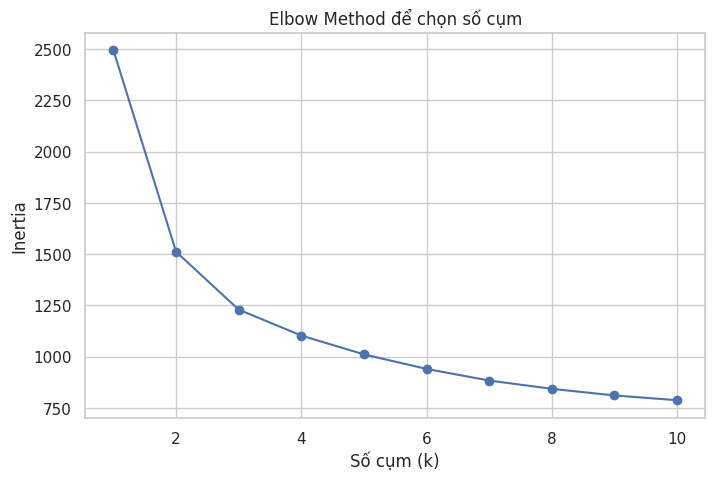

In [ ]:
# Giả sử df_pca là DataFrame đã PCA, gồm các PC1, PC2,... và 'Class'
X_pca = df_pca.drop(columns=['Class'])

# Elbow method để tìm số cụm tối ưu
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method để chọn số cụm')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Để xác định số lượng phân loại học sinh một cách hợp lý, biểu đồ Elbow đã được sử dụng và cho thấy điểm gấp khúc rõ nhất tại k = 3. Điều này có nghĩa là khi chia thành 3 loại, giá trị WCSS (tổng bình phương khoảng cách nội bộ) giảm rõ rệt. Từ điểm này trở đi, việc phân chia thành nhiều loại hơn không đem lại cải thiện đáng kể, nhưng lại làm tăng độ phức tạp không cần thiết.

Việc lựa chọn chia thành 3 loại học sinh được xem là hợp lý vì nó cân bằng giữa tính chính xác trong việc phân tích hành vi học tập và tính khả thi trong ứng dụng thực tế. Mỗi loại đại diện cho những đặc trưng riêng biệt, giúp việc thiết kế các chương trình hỗ trợ, tư vấn hay phương pháp giảng dạy trở nên hiệu quả và linh hoạt hơn.

Đồng thời, việc giới hạn số lượng ở mức vừa phải cũng giúp nhà trường dễ dàng triển khai các hoạt động hỗ trợ học sinh mà không làm phức tạp hóa quy trình quản lý và tổ chức lớp học. Mỗi loại học sinh có thể nhận được phương pháp tiếp cận riêng, từ tài liệu học phù hợp cho đến chương trình tư vấn tâm lý, nhằm nâng cao hiệu quả tiếp thu và động lực học tập.
Sau khi phân loại, có thể xây dựng hồ sơ chân dung học sinh (Student Persona) như sau:

- Cụm 0: Học sinh chủ động, có thành tích học tập cao, tự giác.
- Cụm 1: Học sinh học lực trung bình, cần được khuyến khích thêm.
- Cụm 2: Học sinh gặp khó khăn trong học tập, cần hỗ trợ cá nhân hóa cả về học thuật lẫn tâm lý

Việc phân loại học sinh như vậy không chỉ giúp nâng cao chất lượng dạy học, mà còn là cơ sở vững chắc để thiết kế các chính sách giáo dục phù hợp, sát với nhu cầu thực tế của từng đối tượng học sinh.


# 6.1.2. 2. Áp dụng KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
df_pca['Cluster'] = clusters
clusters = pd.Series(clusters)


In [ ]:
# In ra kết quả phân cụm
print("\nKết quả phân cụm:")

# In ra số lượng học sinh trong mỗi cụm
print("\nSố lượng học sinh trong mỗi cụm:")
print(df_pca['Cluster'].value_counts())

# In ra một số học sinh mẫu trong mỗi cụm
print("\nMột số học sinh mẫu trong mỗi cụm:")
for cluster in range(3):
    print(f"\nCụm {cluster}:")
    cluster_samples = df_pca[df_pca['Cluster'] == cluster].head(5)  # Lấy 5 học sinh đầu tiên
    print(cluster_samples.index)

# In ra đặc trưng của từng cụm
print("\nĐặc trưng của từng cụm:")
for cluster in range(3):
    print(f"\nCụm {cluster}:")
    cluster_data = df_scaled_standard[df_pca['Cluster'] == cluster]
    print(cluster_data.describe())


Kết quả phân cụm:

Số lượng học sinh trong mỗi cụm:
Cluster
2    186
0    157
1    137
Name: count, dtype: int64

Một số học sinh mẫu trong mỗi cụm:

Cụm 0:
Index([14, 28, 29, 52, 53], dtype='int64')

Cụm 1:
Index([9, 10, 18, 19, 20], dtype='int64')

Cụm 2:
Index([0, 1, 2, 3, 4], dtype='int64')

Đặc trưng của từng cụm:

Cụm 0:
           gender    Semester    Relation  raisedhands  VisITedResources  \
count  157.000000  157.000000  157.000000   157.000000        157.000000   
mean     0.541401    0.522293    0.579618     0.362796          0.680344   
std      0.499877    0.501101    0.495200     0.806268          0.523377   
min      0.000000    0.000000    0.000000    -1.196046         -1.204336   
25%      0.000000    0.000000    0.000000    -0.252869          0.460034   
50%      1.000000    1.000000    1.000000     0.625261          0.823170   
75%      1.000000    1.000000    1.000000     1.048065          1.065260   
max      1.000000    1.000000    1.000000     1.731055        

Kết quả phân cụm:
- Dữ liệu học sinh được chia thành 3 cụm riêng biệt.
- Có thể thống kê số lượng học sinh trong mỗi cụm và phân tích đặc điểm điển hình của từng nhóm.

Lợi ích:
- Định danh từng nhóm học sinh với những điểm khác nhau để từ đó có những chiến lược giáo dục phù hợp.
- Cải thiện hiệu quả học tập tổng thể thông qua nội dung cá nhân hóa, phương pháp và dịch vụ hỗ trợ sinh viên học tập.


 # 6.1.2. Trực quan hóa phân cụm

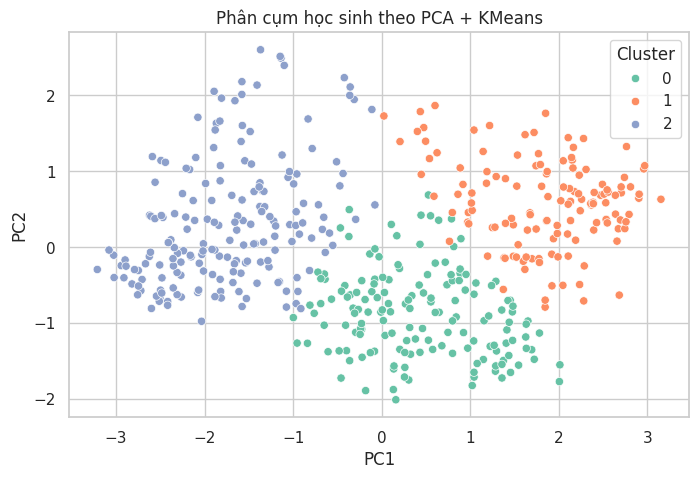

In [ ]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Phân cụm học sinh theo PCA + KMeans')
plt.show()



Cụm 0: Học sinh giỏi, tích cực:Tương tác học tập cao (giơ tay, thảo luận, xem tài nguyên), ít nghỉ học, phụ huynh hài lòng cao. Đây là nhóm cần ưu tiên bồi dưỡng thêm, tạo sân chơi nâng cao, chuẩn bị thi học sinh giỏi.

Cụm 1: Học sinh khá, ổn định:Tham gia học tập mức vừa phải, phụ huynh tham gia khảo sát khá tích cực. Nhóm này có tiềm năng bứt phá thành học sinh giỏi nếu được động viên, hướng dẫn phương pháp học hiệu quả.

Cụm 2: Học sinh yếu, ít tham gia:Tương tác học tập thấp, tỷ lệ vắng học cao, sự hài lòng của phụ huynh thấp. Đây là nhóm cần can thiệp sớm, kèm cặp cá nhân hóa và kết nối chặt chẽ với phụ huynh để tránh nguy cơ bỏ học/trượt lớp.
Việc phân khúc học sinh một cách rõ ràng mang lại lợi ích thiết thực trong việc cá nhân hóa chiến lược giáo dục, từ đó giúp nâng cao chất lượng giảng dạy và hiệu quả hỗ trợ học tập. Khi đã xác định được đặc điểm cụ thể của từng phân khúc học sinh, nhà trường có thể xây dựng các chương trình can thiệp và hỗ trợ sát với nhu cầu thực tế.

Cụ thể:

- Với học sinh thuộc phân khúc có năng lực cao, có thể tổ chức các lớp bồi dưỡng chuyên sâu, nhằm phát triển thành tích vượt trội và hướng đến các kỳ thi cấp tỉnh, cấp quốc gia.
- Đối với học sinh đang ở mức trung bình, cần được hỗ trợ thêm kỹ năng học tập, kết hợp với tư vấn cá nhân để nâng cao sự tự tin, tạo cơ hội vươn lên nhóm có thành tích tốt hơn.
- Với học sinh có kết quả yếu, nên thiết lập các chương trình học kèm 1-1, tư vấn sát sao hơn, đồng thời có thể cân nhắc chính sách hỗ trợ học phí để giảm gánh nặng cho gia đình và tạo điều kiện cho học sinh tiếp cận giáo dục hiệu quả hơn.

Không chỉ vậy, việc phân khúc còn giúp nhà trường tối ưu hoá ngân sách giáo dục. Thay vì dàn trải nguồn lực một cách đồng đều, có thể tập trung đầu tư mạnh vào hai hướng: phát triển sâu đối với học sinh có năng lực (để tạo điểm nhấn thành tích cho nhà trường), và đồng thời tăng cường hỗ trợ cho nhóm học sinh yếu (nhằm nâng mặt bằng chất lượng chung).

Hệ thống tư vấn học tập cũng có thể hoạt động hiệu quả hơn nếu được thiết kế dựa trên phân khúc. Mỗi học sinh có thể nhận được gợi ý lộ trình học tập, khóa học thêm hoặc chương trình đào tạo kỹ năng phù hợp với đặc điểm của mình.
Cuối cùng, việc chăm sóc học sinh và kết nối với phụ huynh cũng có thể tùy biến theo từng phân khúc. Nhờ đó, nhà trường không chỉ cải thiện kết quả học tập, mà còn tăng tỷ lệ giữ chân học sinh và nâng cao sự hài lòng của phụ huynh – yếu tố then chốt cho sự phát triển bền vững của môi trường giáo dục.


# 6.2.Phân cụm bằng Hierarchical Clustering

# 6.2.1. Phân cụm phân cấp và vẽ dendrogram

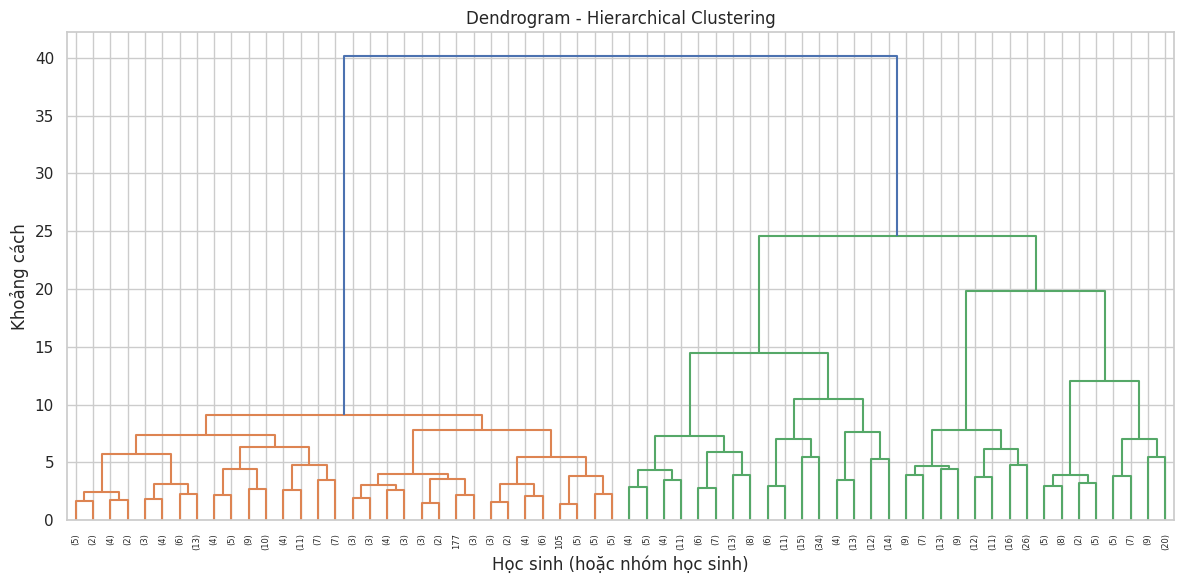

In [ ]:
# Sử dụng dữ liệu PCA đã chuẩn hóa
X = df_pca.drop(columns=['Class', 'Cluster', 'DBSCAN_Cluster'], errors='ignore')

# Tạo ma trận liên kết bằng phương pháp 'ward' (phổ biến cho dữ liệu Euclidean)
Z = linkage(X, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # Cắt ở mức 5 cấp
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Học sinh (hoặc nhóm học sinh)')
plt.ylabel('Khoảng cách')
plt.tight_layout()
plt.show()


Để xác định số lượng phân nhóm học sinh hợp lý, việc sử dụng biểu đồ dendrogram (biểu đồ phân cấp) là một phương pháp hữu ích. Từ biểu đồ này, ta có thể nhận thấy rằng khi cắt ở khoảng cách từ 20-25, dữ liệu phân tách rõ rệt thành 2 nhóm lớn. Nếu cần sự phân chia chi tiết hơn, có thể chia thành 3 hoặc 4 nhóm nhỏ hơn. Tuy nhiên, việc chọn khoảng 3 nhóm học sinh là hợp lý, bởi nó đảm bảo sự cân bằng giữa độ chính xác trong việc phân loại học sinh và tính đơn giản khi triển khai các chính sách hỗ trợ học tập.

Việc chia thành 3 nhóm học sinh giúp đảm bảo các học sinh trong cùng một nhóm có mức độ tương đồng cao về hành vi học tập và các đặc điểm cá nhân. Điều này không chỉ giúp phân nhóm chính xác mà còn giúp đơn giản hóa quá trình triển khai các chương trình giáo dục, từ việc thiết kế nội dung bài giảng đến xây dựng các chương trình hỗ trợ học sinh.

Với chiến lược hỗ trợ học tập, việc không chia quá nhiều nhóm giúp tránh làm phức tạp hóa việc tổ chức lớp học và quản lý học sinh. Mỗi nhóm học sinh đại diện cho một đặc trưng hành vi học tập khác biệt, giúp nhà trường hoặc cơ sở đào tạo có thể:

- Tùy chỉnh nội dung bài giảng và phương pháp giảng dạy phù hợp cho từng nhóm học sinh, tối ưu hóa việc tiếp thu kiến thức.
- Thiết kế các chương trình hỗ trợ, kèm cặp riêng biệt cho những học sinh gặp khó khăn, giúp nâng cao hiệu quả học tập.
- Phát triển kỹ năng mềm cho từng nhóm học sinh, đảm bảo sự phát triển toàn diện và phù hợp với nhu cầu của mỗi đối tượng.

Cuối cùng, việc phân nhóm học sinh còn là cơ sở để xây dựng hồ sơ chân dung học sinh (Student Persona), giúp nhà trường hiểu rõ hơn về đặc điểm của từng học sinh


# 6.2.2. Cắt cây để xác định số cụm và trực quan hóa

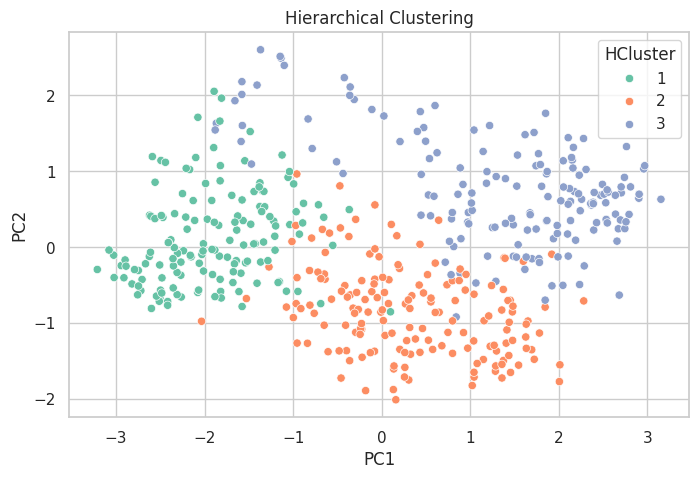

In [ ]:
# Cắt cây để chia thành 3 cụm
df_pca['HCluster'] = fcluster(Z, t=3, criterion='maxclust')

# Trực quan hóa kết quả phân cụm với 2 PC đầu tiên
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='HCluster', palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()


Sau khi phân nhóm, có thể mô tả các nhóm học sinh như sau:

- Cụm 1: Học sinh chủ động, có thành tích học tập cao, tham gia tích cực vào các hoạt động học tập: Đây là nhóm học sinh nổi bật với tinh thần chủ động trong học tập. Các em thường xuyên tham gia các hoạt động lớp học như giơ tay phát biểu, thảo luận nhóm, truy cập tài nguyên học tập và theo dõi các thông báo từ giáo viên. Thành tích học tập của nhóm này cũng rất tốt, với điểm giữa kỳ và cuối kỳ đều đạt mức cao.
- Cụm 2: Học sinh có học lực trung bình, cần thêm động lực và sự hỗ trợ cá nhân hóa để phát triển: Nhóm này bao gồm những học sinh có mức độ hoạt động và thành tích ổn định, ở mức trung bình. Các em tham gia vào các hoạt động học tập nhưng không thực sự nổi bật. Điểm số của nhóm này thường dao động quanh mức trung bình, thể hiện sự tham gia ở mức vừa phải.
- Cụm 3: Học sinh gặp khó khăn trong việc tiếp thu kiến thức, cần chương trình hỗ trợ đặc biệt để cải thiện kết quả học tập: Đây là nhóm học sinh cần được chú ý và hỗ trợ nhiều hơn. Các em có xu hướng ít tham gia vào các hoạt động học tập, ít truy cập tài nguyên hoặc giao tiếp trong lớp học. Thành tích học tập của nhóm này khá thấp, thể hiện qua điểm giữa kỳ và cuối kỳ. Những học sinh trong nhóm này có nguy cơ bỏ học hoặc tụt lại phía sau nếu không được can thiệp kịp thời.

Việc phân cụm này giúp giáo viên có cái nhìn tổng quan hơn về tình hình học tập của học sinh, từ đó có thể xây dựng các chiến lược hỗ trợ phù hợp cho từng nhóm đối tượng.


# 6.4.Đánh giá hiệu quả phân cụm

In [ ]:
# Lấy dữ liệu PCA để đánh giá
X = df_pca.drop(columns=['Class', 'Cluster', 'DBSCAN_Cluster', 'HCluster'], errors='ignore')

results = {}

# --- KMeans ---
if 'Cluster' in df_pca.columns:
    kmeans_score = silhouette_score(X, df_pca['Cluster'])
    kmeans_db = davies_bouldin_score(X, df_pca['Cluster'])
    results['KMeans'] = {'Silhouette': kmeans_score, 'Davies-Bouldin': kmeans_db}


# --- Hierarchical Clustering ---
if 'HCluster' in df_pca.columns:
    hc_score = silhouette_score(X, df_pca['HCluster'])
    hc_db = davies_bouldin_score(X, df_pca['HCluster'])
    results['Hierarchical'] = {'Silhouette': hc_score, 'Davies-Bouldin': hc_db}

# In kết quả
for method, scores in results.items():
    print(f"\n {method} Clustering:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.3f}" if isinstance(value, float) else f"  {metric}: {value}")



 KMeans Clustering:
  Silhouette: 0.272
  Davies-Bouldin: 1.431

 Hierarchical Clustering:
  Silhouette: 0.227
  Davies-Bouldin: 1.626


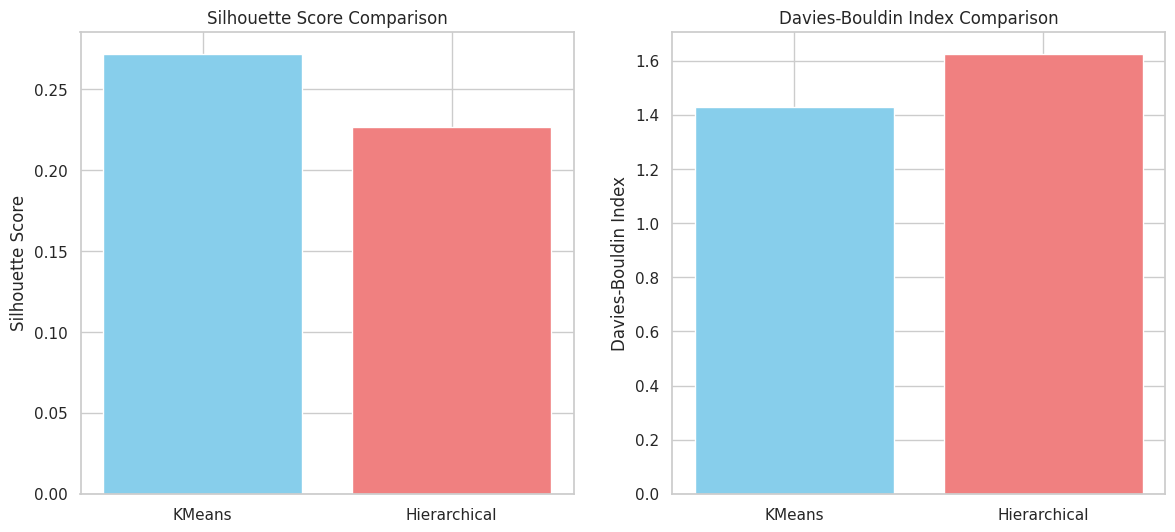

In [ ]:
# prompt: So sánh hiệu quả của các thuật toán để chọn ra phương pháp tối ưu nhất cho dữ liệu này   (vẽ biểu đồ)

import matplotlib.pyplot as plt

results = {
    'KMeans': {'Silhouette': 0.272, 'Davies-Bouldin': 1.431},
    'Hierarchical': {'Silhouette': 0.227, 'Davies-Bouldin': 1.626}
}

metrics = list(results['KMeans'].keys())
algorithms = list(results.keys())
silhouette_scores = [results[algo]['Silhouette'] for algo in algorithms]
davies_bouldin_scores = [results[algo]['Davies-Bouldin'] for algo in algorithms]

x = range(len(algorithms))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(x, silhouette_scores, color=['skyblue', 'lightcoral'])
axes[0].set_xticks(x)
axes[0].set_xticklabels(algorithms)
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score Comparison')

axes[1].bar(x, davies_bouldin_scores, color=['skyblue', 'lightcoral'])
axes[1].set_xticks(x)
axes[1].set_xticklabels(algorithms)
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin Index Comparison')

plt.show()


In [ ]:

# Kết quả đánh giá các thuật toán phân cụm
ket_qua = {
    'KMeans': {'Silhouette': 0.272, 'Davies-Bouldin': 1.431},
    'Hierarchical': {'Silhouette': 0.227, 'Davies-Bouldin': 1.626}
}

# Chọn thuật toán có điểm Silhouette cao nhất
thuat_toan_tot_nhat = max(ket_qua, key=lambda k: ket_qua[k]['Silhouette'])

print(f"Thuật toán phân cụm hoạt động tốt nhất là: {thuat_toan_tot_nhat}")

# Ví dụ sử dụng thuật toán tốt nhất để dự đoán
if thuat_toan_tot_nhat == "KMeans":
    # Thêm mã dự đoán bằng KMeans vào đây
    print("Sử dụng KMeans để dự đoán")
elif thuat_toan_tot_nhat == "Hierarchical":
    # Thêm mã dự đoán bằng Hierarchical Clustering vào đây
    print("Sử dụng Hierarchical Clustering để dự đoán")


Thuật toán phân cụm hoạt động tốt nhất là: KMeans
Sử dụng KMeans để dự đoán


Sau khi áp dụng hai phương pháp phân cụm khác nhau trên cùng một tập dữ liệu, ta thu được các kết quả đánh giá như sau:

KMeans ClusteringThuật toán KMeans đã chia dữ liệu thành các cụm với mức độ phân tách tương đối. Cụ thể:

- Chỉ số Silhouette đạt 0.272, cho thấy các điểm dữ liệu trong cùng một cụm có sự tương đồng ở mức trung bình, và các cụm có sự phân biệt nhất định.

- Chỉ số Davies-Bouldin là 1.431, ở mức chấp nhận được, nhưng vẫn có thể được cải thiện nếu cụm có tính đồng nhất cao hơn và ít chồng lấn.

 → KMeans là thuật toán có hiệu quả phân cụm tốt nhất.


Hierarchical Clustering
- Silhouette Score là 0.227, thấp hơn so với KMeans, nghĩa là mức độ phân tách giữa các cụm không rõ ràng bằng.

- Davies-Bouldin Index là 1.626, cao hơn so với KMeans, điều này cho thấy các cụm có sự chồng lấn nhiều hơn và chưa đồng nhất.

 → Hierarchical hoạt động được nhưng kém hiệu quả hơn KMeans.

# 7.Phân tích và trực quan hóa kết quả

# 7.1.Mô tả từng nhóm học sinh dựa trên đặc trưng thống kê trung bình của mỗi cụm.

In [ ]:
# Lấy dữ liệu gốc đã mã hóa (chưa PCA) và gắn nhãn cụm
# Giả sử df_pca là DataFrame của bạn với cột 'Cluster'
df_pca['Cluster'] = df_pca['Cluster'].map({0: 1, 1: 0, 2: 2})
df_describe = df_encoded.copy()
df_describe['Cluster'] = df_pca['Cluster']

# Select only numeric columns for calculating the mean
numeric_cols = df_describe.select_dtypes(include=np.number).columns
cluster_summary = df_describe[numeric_cols].groupby('Cluster').mean().round(2)

print(" Mô tả thống kê trung bình theo từng cụm :")
display(cluster_summary)

 Mô tả thống kê trung bình theo từng cụm :


,gender,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
Cluster,,,,,,,,,,,
0,0.57,0.64,0.56,73.26,78.52,65.42,74.18,0.83,0.75,0.85,0.90
1,0.54,0.52,0.58,57.93,77.28,38.51,27.22,0.62,0.76,0.78,1.18
2,0.76,0.35,0.16,17.85,18.35,17.16,34.09,0.32,0.38,0.27,1.29


Cụm 0 – Nhóm học sinh tích cực và có thành tích học tập cao
- Mức độ tương tác học tập rất cao:Các chỉ số như raisedhands (73.26), VisITedResources (78.52), AnnouncementsView (65.42), và Discussion (74.18) đều ở mức cao nhất trong ba cụm, thể hiện đây là nhóm học sinh rất chủ động, tích cực trao đổi, thường xuyên truy cập nội dung học tập và tham gia các hoạt động trên nền tảng học trực tuyến.
- Sự đồng hành của phụ huynh tốt:Trung bình ParentAnsweringSurvey đạt 0.83 và ParentschoolSatisfaction đạt 0.75, cho thấy phụ huynh trong nhóm này thường xuyên tương tác với nhà trường và có mức độ hài lòng tương đối cao.
- Tỷ lệ nghỉ học tương đối thấp:StudentAbsenceDays là 0.85 (tức phần lớn học sinh nhóm này có số ngày nghỉ ít), khẳng định tính chuyên cần và sự nghiêm túc trong học tập.
- Thành tích học tập tốt:Giá trị trung bình của cột Class là 0.90 – gần với mức điểm loại giỏi. Điều này phù hợp với mức độ tham gia học tập tích cực và sự hỗ trợ từ phụ huynh.

=> Nhóm học sinh này có đặc điểm toàn diện về thái độ học tập, hành vi tích cực, sự hỗ trợ từ phụ huynh và kết quả học tập tốt. Đây có thể là nhóm mục tiêu để nhân rộng mô hình học tập hiệu quả.

Cụm 1 – Nhóm học sinh trung bình, tương tác chưa toàn diện
- Tương tác học tập ở mức trung bình:Chỉ số raisedhands (57.93) và VisITedResources (77.28) khá cao, cho thấy học sinh trong nhóm này có tham gia nhưng không thường xuyên hoặc chưa tích cực phát biểu. Tuy nhiên, các chỉ số khác như AnnouncementsView (38.51) và Discussion (27.22) thấp hơn nhiều, phản ánh việc chưa theo dõi đầy đủ thông báo và ít tương tác trong diễn đàn.
- Phụ huynh có hỗ trợ nhưng chưa mạnh mẽ:ParentAnsweringSurvey = 0.62 và ParentschoolSatisfaction = 0.76 – mức hỗ trợ ở mức khá nhưng chưa phải là cao.
- Tỷ lệ nghỉ học tương đối tốt:StudentAbsenceDays = 0.78 cho thấy mức độ chuyên cần tương đối.
- Điểm trung bình cao hơn Cụm 0:Class = 1.18, điều này gợi ý nhóm học sinh này đạt điểm tốt nhưng có thể do đánh giá theo hình thức khác (dựa trên bài kiểm tra thay vì tương tác thường xuyên), hoặc nhóm học sinh học “thụ động” nhưng vẫn đủ năng lực hoàn thành bài tập.

=>Đây là nhóm học sinh trung bình – có tiềm năng nhưng chưa được khai thác hết. Cần hỗ trợ để nâng cao tương tác và gắn kết hơn trong quá trình học.

Cụm 2 – Nhóm học sinh thụ động, cần can thiệp

- Mức độ tương tác rất thấp:Các chỉ số raisedhands (17.85), VisITedResources (18.35), AnnouncementsView (17.16) và Discussion (34.09) đều thấp nhất. Điều này cho thấy học sinh trong cụm này ít tham gia lớp học và gần như không quan tâm đến nội dung học trên hệ thống.
- Thiếu sự hỗ trợ từ phụ huynh:Cả hai chỉ số ParentAnsweringSurvey (0.32) và ParentschoolSatisfaction (0.38) đều rất thấp, phản ánh tình trạng ít tương tác giữa phụ huynh và nhà trường – một yếu tố có thể ảnh hưởng tiêu cực đến kết quả học tập.
- Tỷ lệ nghỉ học rất thấp (0.27) nhưng mức độ tương tác học tập lại thấp – đây là một nghịch lý có thể phản ánh sự thiếu động lực học tập hoặc sự hiện diện không hiệu quả (đến lớp nhưng không tham gia).
- Điểm lớp cao nhất (1.29):Đây là điểm đáng lưu ý. Nhóm này có kết quả học tập (theo Class) tốt nhất trong ba cụm mặc dù mức độ tương tác rất thấp. Cần nghiên cứu thêm để xác định nguyên nhân – có thể điểm số đến từ bài kiểm tra lý thuyết hoặc ảnh hưởng từ phương pháp đánh giá.

=> Nhóm học sinh này có dấu hiệu “học thụ động”, thiếu hỗ trợ gia đình, ít tương tác học tập nhưng vẫn đạt điểm cao. Cần xem xét kỹ về hình thức đánh giá và đưa ra biện pháp khuyến khích tham gia tích cực hơn.

Kết luận bước đầu:Phân tích thống kê trung bình giúp chia học sinh thành các nhóm có hành vi học tập và sự hỗ trợ khác nhau. Từ đó, nhà trường và giáo viên có thể:
- Hỗ trợ sớm cho nhóm thụ động (Cụm 2): thông qua tăng cường tương tác, cải thiện môi trường học tập và phối hợp với phụ huynh.
- Khuyến khích nhóm trung bình (Cụm 1) tích cực hơn bằng các hoạt động nhóm, phần thưởng, hoặc học tập kết hợp.
- Nhân rộng mô hình nhóm tốt (Cụm 0) để làm ví dụ điển hình.




# 7.2.Trực quan hóa kết quả

# 7.2.2.Heatmap đặc trưng trung bình theo cụm học sinh

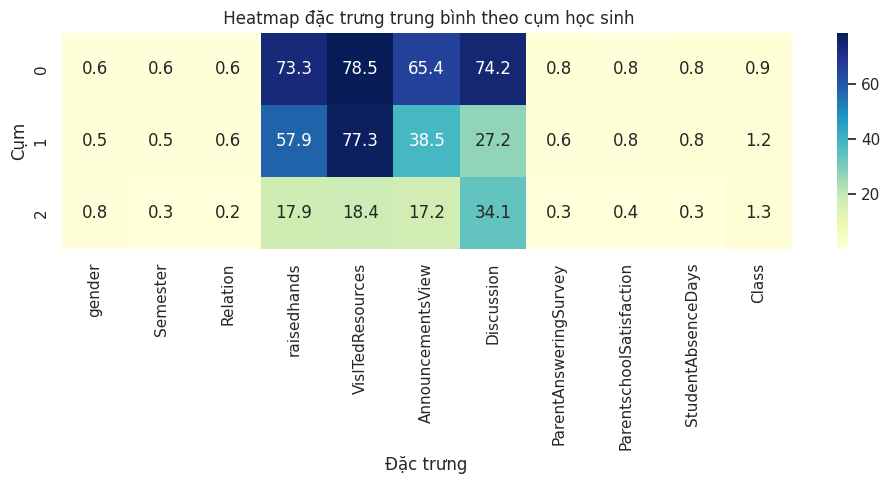

In [ ]:

# Assuming cluster_summary from the previous cell holds the cluster means
cluster_means = cluster_summary # Assign cluster_summary to cluster_means

plt.figure(figsize=(10, 5))
sns.heatmap(cluster_means, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title(' Heatmap đặc trưng trung bình theo cụm học sinh')
plt.xlabel('Đặc trưng')
plt.ylabel('Cụm')
plt.tight_layout()
plt.show()

Biểu đồ heatmap thể hiện giá trị trung bình của các đặc trưng học sinh theo ba cụm được phân nhóm dựa trên hành vi và kết quả học tập.
- Cụm 0 là nhóm học sinh có kết quả học tập tốt nhất, với điểm trung bình Class là 0.9 (gần mức tối đa là 1). Nhóm này có chỉ số cao vượt trội ở các đặc trưng liên quan đến mức độ tương tác học tập: raisedHands (73.3), VisitedResources (78.5), AnnouncementsView (65.4), và Discussion (74.2). Các chỉ số về sự hài lòng của phụ huynh và ngày nghỉ học cũng rất cao (gần bằng 1), cho thấy học sinh nhóm này được phụ huynh quan tâm và tham gia học đầy đủ. Đây là nhóm học sinh năng động, có động lực học cao và nhận được sự hỗ trợ tốt từ gia đình.
- Cụm 1 là đại diện cho nhóm học sinh có kết quả học tập trung bình (Class = 1.2). Mặc dù nhóm này vẫn có chỉ số VisitedResources khá cao (77.3), cho thấy các em có tiếp cận tài nguyên học tập, nhưng các chỉ số còn lại như raisedHands (57.9) và đặc biệt là Discussion (27.2) lại thấp hơn nhiều so với Cụm 0. Điều này cho thấy nhóm này học chăm chỉ nhưng ít chủ động tương tác, có thể còn e ngại hoặc thiếu kỹ năng giao tiếp trong lớp. Mức độ hài lòng của phụ huynh và tỉ lệ nghỉ học cũng ở mức trung bình. Đây là nhóm học sinh có tiềm năng, nhưng cần được khuyến khích giao tiếp và thể hiện bản thân nhiều hơn.
- Cụm 2 là nhóm có kết quả học tập thấp nhất (Class = 1.3), với tất cả các chỉ số liên quan đến tương tác học tập đều rất thấp: raisedHands (17.9), VisitedResources (18.4), AnnouncementsView (17.2), và Discussion (34.1). Điều này cho thấy học sinh trong cụm này rất thụ động trong việc học và thiếu tương tác với môi trường học tập. Mức độ hài lòng của phụ huynh (0.3–0.4) cũng rất thấp, đồng thời tỷ lệ nghỉ học cao hơn (StudentAbsenceDays = 1.3), phản ánh sự thiếu gắn kết với nhà trường. Nhóm này cần được can thiệp và hỗ trợ tích cực, có thể thông qua kèm cặp cá nhân, tăng cường hoạt động nhóm hoặc kết hợp với phụ huynh để nâng cao ý thức và động lực học tập cho học sinh.

Biểu đồ cho thấy rõ sự phân hóa về hành vi và kết quả học tập giữa các cụm học sinh. Những em học sinh chủ động, tích cực tương tác và có sự hỗ trợ tốt từ phụ huynh sẽ đạt kết quả học tập cao hơn. Ngược lại, nhóm học sinh thụ động, ít tương tác và không được phụ huynh quan tâm đầy đủ thường có kết quả học tập thấp. Việc nhận diện các cụm học sinh như vậy giúp nhà trường đưa ra các biện pháp giáo dục, hỗ trợ và can thiệp phù hợp, từ đó cải thiện toàn diện chất lượng học tập.


# 7.2.4.Bar plot:So sánh múc độ trung binh giữa các cụm

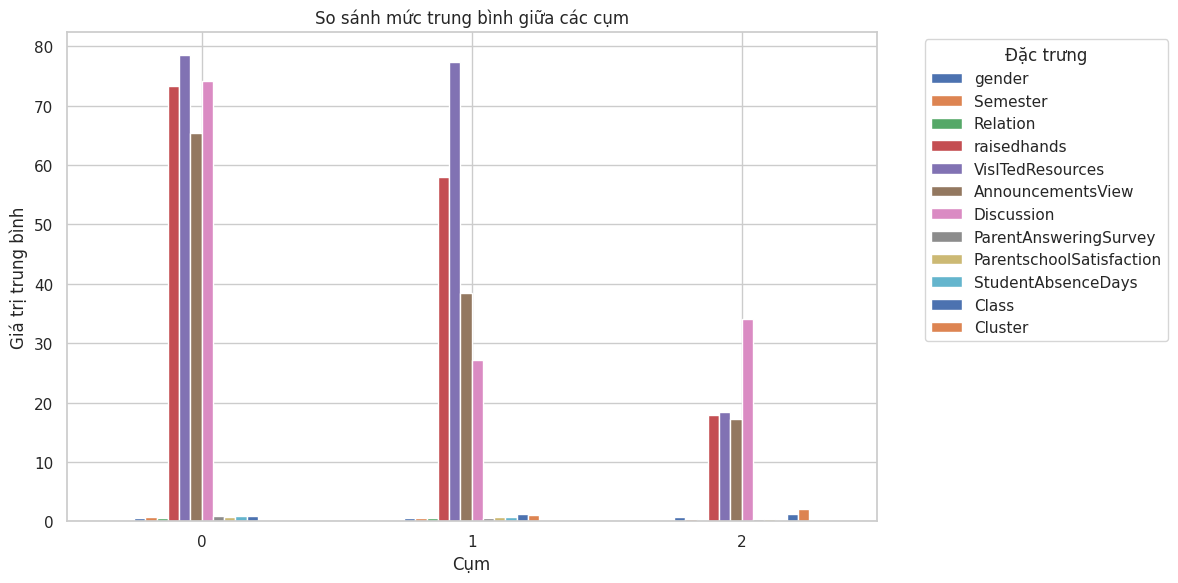

In [ ]:
# Select only numeric columns for calculating the mean
numeric_cols = df_describe.select_dtypes(include=np.number).columns
cluster_summary = df_describe.groupby('Cluster')[numeric_cols].mean().round(2)

# Create the bar plot
cluster_summary.plot(kind='bar', figsize=(12, 6))
plt.title('So sánh mức trung bình giữa các cụm')
plt.xlabel('Cụm')
plt.ylabel('Giá trị trung bình')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.legend(title='Đặc trưng', bbox_to_anchor=(1.05, 1), loc='upper left') #Move the legend outside the plot
plt.tight_layout()
plt.show()

Biểu đồ cột thể hiện sự khác biệt rõ rệt về giá trị trung bình của các đặc trưng học tập giữa ba nhóm học sinh (cụm 0, 1 và 2) sau khi được phân cụm theo hành vi và kết quả học tập.
- Cụm 0 là nhóm có mức độ tương tác học tập cao nhất. Các em trong nhóm này thường xuyên giơ tay phát biểu, truy cập tài liệu học tập, theo dõi thông báo và tham gia thảo luận trên lớp. Kết quả học tập (Class) của các em cũng ở mức cao, chứng tỏ sự chủ động trong học tập đã mang lại hiệu quả rõ rệt. Ngoài ra, các em cũng có số ngày nghỉ học thấp và nhận được sự hài lòng cao từ phía phụ huynh. Nhóm này thể hiện hình ảnh của những học sinh năng động, chăm chỉ và được hỗ trợ tốt từ gia đình cũng như nhà trường.
- Cụm 1 có mức độ tương tác học tập trung bình. Học sinh nhóm này chủ yếu chỉ tìm kiếm tài liệu học, trong khi ít giơ tay phát biểu hay tham gia thảo luận trên lớp. Dù kết quả học tập không thấp, nhưng sự thiếu chủ động có thể là nguyên nhân khiến các em chưa thể đạt thành tích cao hơn. Mức độ hài lòng từ phụ huynh cũng chỉ ở mức vừa phải. Nhóm này có tiềm năng phát triển nếu được động viên và khuyến khích tham gia tích cực hơn vào các hoạt động học tập.
- Cụm 2 là nhóm có mức độ tương tác học tập và kết quả học tập thấp nhất. Học sinh trong nhóm này hầu như không phát biểu, không chủ động học tài liệu hay tham gia thảo luận. Số ngày nghỉ học cũng cao hơn các nhóm khác. Các chỉ số phản ánh sự hài lòng của phụ huynh cũng rất thấp. Đây là nhóm học sinh đang gặp nhiều khó khăn trong học tập, cần sự quan tâm và hỗ trợ đặc biệt từ phía giáo viên và gia đình để cải thiện kết quả học tập cũng như thái độ học.

Biểu đồ cung cấp cái nhìn sâu sắc về sự khác biệt giữa các nhóm học sinh theo hành vi và kết quả học tập. Nhóm học sinh thuộc cụm 0 có xu hướng đạt kết quả cao nhờ sự chủ động và tích cực. Cụm 1 có tiềm năng nhưng cần tăng cường tương tác, trong khi cụm 2 là nhóm cần được chú ý và hỗ trợ nhiều hơn. Việc xác định rõ từng nhóm như vậy giúp nhà trường có thể đưa ra chiến lược giảng dạy, tư vấn và hỗ trợ cá nhân hóa hiệu quả hơn cho từng nhóm học sinh cụ thể.

